# Databricks - Data Analysis 

### The Project

In this project we will explore some data analysis using the cursos_prouni.csv database. This database provides information on the entry of university students into the education system using scholarships provided by the Brazilian government benefit called PROUNI.
Our analysis of this project is more focused on the medical course

### Medicine in Brazil

In Brazil, medical courses are extremely competitive and demanding, with an intense course load and an average duration of six years. Medical schools in the country offer training in various areas, such as surgery, pediatrics, gynecology and obstetrics, among other medical specialties.

There are scholarship options for students who wish to study medicine in the country. One of the main options is the University for All Program (PROUNI), which offers partial and full scholarships at private universities for low-income students who have obtained good grades in the Enem.

In addition, there is also the possibility of entering public universities, which are free and offer quality education recognized worldwide. However, the selection process for admission to public universities is very competitive and requires high performance from candidates.

In the next sections, we will provide some results based on modified data from PROUNI and public universities, in order to provide more detailed information about scholarship options and admission to these educational institutions.

# Imports:

In [0]:
# Pandas API PySpark:
import pyspark.pandas  as ps

#PySpark.sql:
from pyspark.sql.functions import col, mean, round, sum, when, expr, split

# Checking directories

In [0]:
dbutils.fs.ls('/FileStore/')

[FileInfo(path='dbfs:/FileStore/tables/', name='tables/', size=0, modificationTime=0)]

In [0]:
display(dbutils.fs.ls('/FileStore/tables/'))

path name size modificationTime dbfs:/FileStore/tables/databricks-classes/ databricks-classes/ 0 0

In [0]:
display(dbutils.fs.ls('/FileStore/tables/databricks-classes/'))

path name size modificationTime dbfs:/FileStore/tables/databricks-classes/data-analysis/ data-analysis/ 0 0 dbfs:/FileStore/tables/databricks-classes/file-formats/ file-formats/ 0 0 dbfs:/FileStore/tables/databricks-classes/wine-quality/ wine-quality/ 0 0

In [0]:
 display(dbutils.fs.ls('/FileStore/tables/databricks-classes/data-analysis/'))

path name size modificationTime dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/ Files-Parquet/ 0 0 dbfs:/FileStore/tables/databricks-classes/data-analysis/cursos_prouni.csv cursos_prouni.csv 9225477 1705477717000 dbfs:/FileStore/tables/databricks-classes/data-analysis/reajuste.csv reajuste.csv 124990 1705477715000

In [0]:
# File location and type
file_location = '/FileStore/tables/databricks-classes/data-analysis/cursos_prouni.csv'
file_type = 'csv'

# Options
infer_schema = 'True'
first_row_is_header = 'True'
delimiter = ','

# Reading Database
df_prouni = spark.read.format(file_type) \
  .option('inferSchema', infer_schema) \
  .option('header', first_row_is_header) \
  .option('sep', delimiter) \
  .load(file_location)

display(df_prouni)

grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla curso_id curso_busca cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas Bacharelado Integral 9999.99 15 14 null null 706710394154 Medicina Campo Grande MS NTAwMjAwNDAyNzA0 Universidade Anhanguera - UNIDERP CAMPO GRANDE - SEDE - Miguel Couto 706710 Medicina 740.22 726.46 null null Bacharelado Noturno 9836.4 1 null null null 104191210567043 Enfermagem Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Enfermagem 663.36 null null null Bacharelado Integral 9715.61 2 5 6 10 1002328574024 Medicina Sao Paulo SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 Bacharelado Noturno 9689.34 3 2 null null 104191212798093 Psicologia Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Psicologia 651.0 652.22 null null Bacharelado Integral 9674.34 4 1 5 2 65899611932754 Medicina Rio Branco AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 Bacharelado Integral 9650.0 8 15 null null 65781564964 Medicina Presidente Prudente SP MzUwODAzNjQxNDA2 Universidade do Oeste Paulista - UNOESTE CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDENTE - Cidade Universitária 657815 Medicina 738.92 728.86 null null Bacharelado Integral 9564.0 3 5 null null 65788486984 Medicina Marilia SP MzUwOTAzODI5MDA1 Universidade de Marília - UNIMAR UNIDADE SEDE - Campus Universitario 657884 Medicina 744.16 735.0 null null Bacharelado Integral 9350.0 4 3 null null 65861111850254 Medicina Sao Joao Del Rei MG MzExMTA1ODYyNTAw Centro Universitário Presidente Tancredo de Almeida Neves - UNIPTAN UNIDADE SEDE (UNIDADE) - Fábricas 658611 Medicina 747.84 736.68 null null Bacharelado Integral 9208.0 7 5 null null 658099184724 Medicina Cuiaba MT NTEwNDAxNzAzNDAz Universidade de Cuiabá - UNIC/UNIME UNIC - BEIRA RIO (SEDE) - Jardim Europa 658099 Medicina 735.4 725.36 null null Bacharelado Integral 9048.0 13 4 null null 10505911785244 Medicina Lauro de Freitas BA MjkwNTAyMTE5MjA3 Faculdade de Ciências Agrárias e da Saúde - FAS UNIDADE SEDE - Centro 105059 Medicina 741.04 730.36 null null Bacharelado Integral 9023.07 4 4 5 5 65921511844324 Medicina Itaperuna RJ MzMwMTAwMTAyMjA1 Faculdade Redentor - FACREDENTOR CAMPUS - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva 659215 Medicina 741.06 729.02 730.98 722.82 Bacharelado Noturno 8695.43 5 1 null null 1055878921193 Engenharia de Computação Salvador BA MjkwNTAyMTI3NDA4 Universidade Salvador - UNIFACS CAMPUS RIO VERMELHO - Rio Vermelho 1055878 Engenharia de Computação 747.9 637.54 null null Bacharelado Integral 8600.0 2 9 null null 65881713994834 Medicina Rio Claro SP MzUwNjAyNjQzOTA3 Claretiano - Faculdade - Claretianorc - CLARETIANORC CLARETIANO - FACULDADE - Cidade Claret 658817 Medicina 734.44 720.86 null null Bacharelado Integral 8508.54 2 1 7 2 104123711716094 Medicina Belem PA MTUwMzAwNzAxNDAy Faculdade Metropolitana da Amazônia - FAMAZ FACULDADE METROPOLITANA DA AMAZÔNIA - FAMAZ - Reduto 1041237 Medicina 741.36 739.9 760.8 715.1 Licenciatura Matutino 8466.72 1 2 null null 689693216461 Educação Física Curitiba PR NDExMDAzNzA2OTAy Faculdade Dom Bosco - FDB UNIDADE MERCÊS - Mercês 689693 Educação Física 579.2 570.4 null null Bacharelado Matutino 8466.72 1 4 null null 6896933216461 Educação Física Curitiba PR NDExMDAzNzA2OTAy Faculdade Dom Bosco - FDB UNIDADE MERCÊS - Mercês 689693 Educação Física 589.08 577.32 null null Bacharelado Integral 8402.0 4 1 null null 105821211803184 Medicina Parnaiba PI MjIwMTAwMjA3NzAy Faculdade de Ciências Humanas,Exatas e da Saúde do Piauí - FAHESP CAMPUS PRINCIPAL / FAHESP- FAC

In [0]:
# File location and type
file_location = '/FileStore/tables/databricks-classes/data-analysis/reajuste.csv'
file_type = 'csv'

# Options
infer_schema = 'True'
first_row_is_header = 'True'


# Reading Database
df_reajuste = spark.read.format(file_type) \
  .option('inferSchema', infer_schema) \
  .option('header', first_row_is_header) \
  .load(file_location)

display(df_reajuste)

reajuste 100 50 100 50 100 100 100 100 100 100 100 50 100 100 50 50 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 50 100 100 100 100 100 100 100 100 100 50 50 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 50 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 50 50 100 100 100 100 100 50 50 100 100 100 100 100 50 50 100 100 100 100 100 100 100 100 100 100 100 100 100 50 100 100 100 50 100 100 100 100 100 100 100 100 100 100 100 100 50 100 100 100 50 50 100 100 100 100 50 100 100 50 50 50 100 100 50 100 50 100 50 100 50 100 50 50 100 100 100 100 100 100 100 100 100 100 100 100 100 50 50 100 100 100 100 50 100 50 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 50 50 100 50 100 100 100 100 50 100 100 100 100 100 50 50 50 50 100 100 100 50 50 50 100 100 50 100 100 100 50 50 100 100 100 100 50 100 100 100 50 50 50 100 100 50 50 50 100 100 100 100 100 100 100 50 100 100 100 100 100 100 100 100 50 50 50 50 50 50 100 100 50 50 100 100 100 100 50 50 50 50 50 50 100 50 50 50 50 50 100 50 50 100 50 50 50 50 100 100 100 50 100 100 50 100 100 100 50 100 100 50 100 100 50 50 100 100 100 50 50 50 50 50 50 50 100 50 50 50 50 50 50 100 50 50 50 100 100 100 50 100 100 50 100 100 100 50 50 50 100 50 100 50 50 50 50 50 50 100 100 100 100 50 50 50 100 50 50 100 50 50 50 50 50 50 50 50 50 100 100 100 50 100 50 50 50 50 100 50 50 100 50 100 50 100 100 100 50 100 100 50 100 100 100 50 50 50 50 50 50 50 50 50 100 50 100 100 100 50 100 50 50 100 50 50 100 100 50 50 50 50 50 50 100 50 50 100 50 50 50 100 50 50 50 100 50 50 50 50 50 50 50 50 100 50 100 100 50 50 50 100 50 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 100 50 50 100 50 100 50 50 50 50 50 50 50 50 50 50 100 100 50 50 50 50 50 50 100 50 100 50 50 50 50 50 50 50 50 50 100 100 100 50 100 100 100 100 100 100 50 50 50 50 50 50 100 100 100 100 50 50 50 50 50 50 100 50 50 50 50 50 50 50 50 100 50 100 100 50 50 100 50 50 50 50 100 50 50 50 50 50 100 50 50 100 50 100 100 100 100 100 100 50 50 50 100 50 50 50 50 50 50 50 50 50 50 50 50 100 100 100 50 50 50 50 50 100 50 100 50 50 50 50 50 50 50 50 50 50 50 50 100 50 100 100 50 50 50 50 100 50 50 50 50 50 50 50 50 50 100 100 50 100 50 50 50 50 50 100 50 50 50 50 50 100 50 50 50 100 50 50 50 50 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 50 100 50 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 50 50 50 50 100 50 50 50 50 100 50 100 50 50 50 50 50 50 50 50 50 50 50 50 100 50 50 50 50 50 50 50 100 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 100 50 50 50 50 50 50 50 50 50 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 50 50 50 50 50 50 50 50 100 100 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 50 100 50 50 50 50 50 50 100 100 50 50 100 50 50 100 50 50 50 50 50 50 50 50 100 50 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 50 50 100 50 50 50 50 100 50 50 50 50 50 50 50 50 50 50 50 100 50 50 100 50 50 50 50 50 50 50 100 50 50 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 50 50 50 50 100 50 100 50 50 50 50 50 100 50 50 100 50 50 50 50 50 50 50 100 100 50 50 50 100 100 100 50 50 50 50 50 50 100 50 50 50 50 50 50 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 50 50 50 50 50 100 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 50 50 50 50 100 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 100 50 50 50 100 100 100 100 100 50 50 50 50 50 100 50 50

### Writing Files in PARQUET format

In order to have better performance in our queries, I chose to use our data in PARQUET format

In [0]:
dbutils.fs.mkdirs('/FileStore/tables/databricks-classes/data-analysis/Files-Parquet')

True

### Prouni saving file in PARQUET

In [0]:
# File location and type
file_location = '/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet'
file_type = 'parquet'

# Options

# Mode
mode = 'overwrite'

# Reading Database
df_prouni.write.format(file_type) \
    .mode(mode)\
    .save(file_location)

display(dbutils.fs.ls(file_location))

path name size modificationTime dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_1028369361946248995 _committed_1028369361946248995 626 1706134565000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_1980497289302738155 _committed_1980497289302738155 626 1706043662000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_225846599202717101 _committed_225846599202717101 626 1706132978000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_2733306224203885582 _committed_2733306224203885582 617 1706126093000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_282637377468941886 _committed_282637377468941886 626 1706134745000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_3137797371561060260 _committed_3137797371561060260 623 1706081688000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_352554187699050509 _committed_352554187699050509 617 1706028627000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_3675826505361461323 _committed_3675826505361461323 629 1706171390000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_3886342496491644612 _committed_3886342496491644612 623 1706169389000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_4520823471080770660 _committed_4520823471080770660 634 1706009116000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_458745416552178571 _committed_458745416552178571 623 1706135136000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_5718101096200011985 _committed_5718101096200011985 626 1706135558000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_6530909231532472906 _committed_6530909231532472906 623 1706131986000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_7532232956636277551 _committed_7532232956636277551 620 1706037520000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_8315013855269382820 _committed_8315013855269382820 623 1706170526000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_8433388548868604507 _committed_8433388548868604507 614 1706037068000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_851883793531937442 _committed_851883793531937442 623 1706134071000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_committed_8579088597491582994 _committed_8579088597491582994 620 1706009394000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_started_3675826505361461323 _started_3675826505361461323 0 1706171388000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/_started_8315013855269382820 _started_8315013855269382820 0 1706170524000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/part-00000-tid-3675826505361461323-2c750698-ec16-4dae-a718-e2e90c544748-2910-1-c000.snappy.parquet part-00000-tid-3675826505361461323-2c750698-ec16-4dae-a718-e2e90c544748-2910-1-c000.snappy.parquet 668684 1706171389000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet/part-00001-tid-3675826505361461323-2c750698-ec16-4dae-a718-e2e90c544748-2911-1-c000.snappy.parquet part-00001-tid-3675826505361461323-2c750698-ec16-4dae-a718-e2e90c544748-2911-1-c000.snappy.parquet 468886 1706171389000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parqu

### Reajuste saving file in PARQUET

In [0]:
# File location and type
file_location = '/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet'
file_type = 'parquet'

# Options

# Mode
mode = 'overwrite'

# Reading Database
df_reajuste.write.format(file_type) \
    .mode(mode)\
    .save(file_location)

display(dbutils.fs.ls(file_location))

path name size modificationTime dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_1655476625764965822 _committed_1655476625764965822 223 1706169395000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_2452491159432484062 _committed_2452491159432484062 223 1706170529000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_3026093440885976579 _committed_3026093440885976579 225 1706134073000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_3034374541719229927 _committed_3034374541719229927 224 1706043666000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_3497393481930691701 _committed_3497393481930691701 223 1706131989000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_4082687442756294589 _committed_4082687442756294589 225 1706171392000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_4138071690505017053 _committed_4138071690505017053 222 1706037523000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_4214633125167863199 _committed_4214633125167863199 224 1706135138000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_4282765964162336796 _committed_4282765964162336796 225 1706134567000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_5163676705201281556 _committed_5163676705201281556 221 1706037073000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_5421895981276819892 _committed_5421895981276819892 221 1706126098000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_5464200364278178220 _committed_5464200364278178220 220 1706009397000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_5789343915788381411 _committed_5789343915788381411 223 1706081694000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_580760449526227789 _committed_580760449526227789 224 1706134747000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_6979555418623986094 _committed_6979555418623986094 225 1706132980000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_7754900986810592765 _committed_7754900986810592765 222 1706028631000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_9122149374934553313 _committed_9122149374934553313 225 1706135560000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_committed_93268512981731144 _committed_93268512981731144 232 1706009122000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_started_2452491159432484062 _started_2452491159432484062 0 1706170528000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/_started_4082687442756294589 _started_4082687442756294589 0 1706171392000 dbfs:/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet/part-00000-tid-4082687442756294589-ded42c50-8331-4b05-b33d-f00e1976fbfd-2921-1-c000.snappy.parquet part-00000-tid-4082687442756294589-ded42c50-8331-4b05-b33d-f00e1976fbfd-2921-1-c000.snappy.parquet 1572 1706171392000

#  Pandas API Pyspark 

### Reading Database Prouni

In [0]:
df_pandas_prouni = ps.read_parquet('/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet', index_col = 'curso_id')

In [0]:
df_pandas_prouni.head(10)

grau     turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla curso_busca         cidade_busca uf_busca     cidade_filtro                                                    universidade_nome                                                               campus_nome  campus_id        nome  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
curso_id                                                                                                                                                                                                                                                                                                                                                                                                                                                     
706710394154     Bacharelado  Integral      9999.99                    15                  14.0                  NaN                  NaN    Medicina         Campo Grande       MS  NTAwMjAwNDAyNzA0                                    Universidade Anhanguera - UNIDERP                                        CAMPO GRANDE - SEDE - Miguel Couto     706710    Medicina               740.22               726.46                 NaN                 NaN
104191210567043  Bacharelado   Noturno      9836.40                     1                   NaN                  NaN                  NaN  Enfermagem              Crateus       CE  MjMwNDAxODA0MTAz                                    Faculdade Princesa do Oeste - FPO                                                UNIDADE SEDE - São Vicente    1041912  Enfermagem               663.36                  NaN                 NaN                 NaN
1002328574024    Bacharelado  Integral      9715.61                     2                   5.0                  6.0                 10.0    Medicina            Sao Paulo       SP  MzUxNTA2MTUwMzA4                            Universidade Cidade de São Paulo - UNICID                UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé    1002328    Medicina               739.62               738.08              738.96              718.64
104191212798093  Bacharelado   Noturno      9689.34                     3                   2.0                  NaN                  NaN  Psicologia              Crateus       CE  MjMwNDAxODA0MTAz                                    Faculdade Princesa do Oeste - FPO                                                UNIDADE SEDE - São Vicente    1041912  Psicologia               651.00               652.22                 NaN                 NaN
65899611932754   Bacharelado  Integral      9674.34                     4                   1.0                  5.0                  2.0    Medicina           Rio Branco       AC  MTIwMjAwNDAwNDAx                                  Faculdade Barão do Rio Branco - FAB                CAMPUS  - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II     658996    Medicina               758.32               723.94              734.92              711.26
65781564964      Bacharelado  Integral      9650.00                     8                  15.0                  NaN                  NaN    Medicina  Presidente Prudente       SP  MzUwODAzNjQxNDA2                             Universidade do Oeste Paulista - UNOESTE  CAMPUS I  SEDE ADMINISTRATIVA PRESIDENTE PRUDENTE - Cidade Universitária     657815    Medicina               738.92               728.86                 NaN                 NaN
65788486984      Bacharelado  Integral      9564.00                     3                   5.0                  NaN                  NaN    Medicina              Marilia       SP  MzUwOTAzODI5MDA1                                     Universidade de Marília - UNIMAR                                       UNIDADE SEDE - Campus Universitario     657884    Medicina               744.16               735.00                 NaN                 NaN
6586111185

In [0]:
df_pandas_prouni.shape

(41447, 19)

### Checking if the columns are equivalent

In [0]:
df_pandas_prouni['curso_busca'].equals(df_pandas_prouni['nome']).sum()

41447

### Drop Column

In [0]:
df_pandas_prouni = df_pandas_prouni.drop(['curso_busca'], axis = 1)
df_pandas_prouni.head(5)

grau     turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla  cidade_busca uf_busca     cidade_filtro                          universidade_nome                                                 campus_nome  campus_id        nome  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
curso_id                                                                                                                                                                                                                                                                                                                                                                                          
706710394154     Bacharelado  Integral      9999.99                    15                  14.0                  NaN                  NaN  Campo Grande       MS  NTAwMjAwNDAyNzA0          Universidade Anhanguera - UNIDERP                          CAMPO GRANDE - SEDE - Miguel Couto     706710    Medicina               740.22               726.46                 NaN                 NaN
104191210567043  Bacharelado   Noturno      9836.40                     1                   NaN                  NaN                  NaN       Crateus       CE  MjMwNDAxODA0MTAz          Faculdade Princesa do Oeste - FPO                                  UNIDADE SEDE - São Vicente    1041912  Enfermagem               663.36                  NaN                 NaN                 NaN
1002328574024    Bacharelado  Integral      9715.61                     2                   5.0                  6.0                 10.0     Sao Paulo       SP  MzUxNTA2MTUwMzA4  Universidade Cidade de São Paulo - UNICID  UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé    1002328    Medicina               739.62               738.08              738.96              718.64
104191212798093  Bacharelado   Noturno      9689.34                     3                   2.0                  NaN                  NaN       Crateus       CE  MjMwNDAxODA0MTAz          Faculdade Princesa do Oeste - FPO                                  UNIDADE SEDE - São Vicente    1041912  Psicologia               651.00               652.22                 NaN                 NaN
65899611932754   Bacharelado  Integral      9674.34                     4                   1.0                  5.0                  2.0    Rio Branco       AC  MTIwMjAwNDAwNDAx        Faculdade Barão do Rio Branco - FAB  CAMPUS  - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II     658996    Medicina               758.32               723.94              734.92              711.26

In [0]:
df_pandas_prouni = df_pandas_prouni.rename(columns = {'nome': 'nome_curso'})

In [0]:
df_pandas_prouni.head(5)

grau     turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla  cidade_busca uf_busca     cidade_filtro                          universidade_nome                                                 campus_nome  campus_id  nome_curso  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
curso_id                                                                                                                                                                                                                                                                                                                                                                                          
706710394154     Bacharelado  Integral      9999.99                    15                  14.0                  NaN                  NaN  Campo Grande       MS  NTAwMjAwNDAyNzA0          Universidade Anhanguera - UNIDERP                          CAMPO GRANDE - SEDE - Miguel Couto     706710    Medicina               740.22               726.46                 NaN                 NaN
104191210567043  Bacharelado   Noturno      9836.40                     1                   NaN                  NaN                  NaN       Crateus       CE  MjMwNDAxODA0MTAz          Faculdade Princesa do Oeste - FPO                                  UNIDADE SEDE - São Vicente    1041912  Enfermagem               663.36                  NaN                 NaN                 NaN
1002328574024    Bacharelado  Integral      9715.61                     2                   5.0                  6.0                 10.0     Sao Paulo       SP  MzUxNTA2MTUwMzA4  Universidade Cidade de São Paulo - UNICID  UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé    1002328    Medicina               739.62               738.08              738.96              718.64
104191212798093  Bacharelado   Noturno      9689.34                     3                   2.0                  NaN                  NaN       Crateus       CE  MjMwNDAxODA0MTAz          Faculdade Princesa do Oeste - FPO                                  UNIDADE SEDE - São Vicente    1041912  Psicologia               651.00               652.22                 NaN                 NaN
65899611932754   Bacharelado  Integral      9674.34                     4                   1.0                  5.0                  2.0    Rio Branco       AC  MTIwMjAwNDAwNDAx        Faculdade Barão do Rio Branco - FAB  CAMPUS  - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II     658996    Medicina               758.32               723.94              734.92              711.26

### Checking the number of medical courses

In [0]:
df_pandas_prouni[df_pandas_prouni['nome_curso'] == 'Medicina']['nome_curso'].count()

124

### Checking course periods

In [0]:
df_pandas_prouni['turno'].unique()

0             Matutino
1    Curso a Distância
2           Vespertino
3             Integral
4              Noturno
Name: turno, dtype: object

### Check how many people study medicine full time

In [0]:
df_pandas_prouni[(df_pandas_prouni['turno'] == 'Integral') & (df_pandas_prouni['nome_curso'] == 'Medicina')]['nome_curso'].count()

123

In [0]:
df_pandas_prouni[(df_pandas_prouni['turno'] == 'Integral') & (df_pandas_prouni['nome_curso'] == 'Medicina') | (df_pandas_prouni['turno'] == 'Matutino') & (df_pandas_prouni['nome_curso'] == 'Medicina')]['nome_curso'].count()

124

### Reading Database Reajuste

In [0]:
df_pandas_reajust = ps.read_parquet('/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet')

In [0]:
df_pandas_reajust.head(5)

reajuste
0       100
1        50
2       100
3        50
4       100

In [0]:
df_pandas_reajust.shape

(41447, 1)

### Added the base date adjustment to the main date, to calculate the monthly payments.

In [0]:
ps.set_option('compute.ops_on_diff_frames', True)

In [0]:
df_pandas_prouni.reset_index(inplace = True)

In [0]:
df_pandas_prouni['mensalidade'] = df_pandas_prouni['mensalidade'] + df_pandas_reajust['reajuste']

In [0]:
df_pandas_prouni.head(5)

curso_id         grau     turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla  cidade_busca uf_busca     cidade_filtro                          universidade_nome                                                 campus_nome  campus_id  nome_curso  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
0     706710394154  Bacharelado  Integral     10099.99                    15                  14.0                  NaN                  NaN  Campo Grande       MS  NTAwMjAwNDAyNzA0          Universidade Anhanguera - UNIDERP                          CAMPO GRANDE - SEDE - Miguel Couto     706710    Medicina               740.22               726.46                 NaN                 NaN
1  104191210567043  Bacharelado   Noturno      9886.40                     1                   NaN                  NaN                  NaN       Crateus       CE  MjMwNDAxODA0MTAz          Faculdade Princesa do Oeste - FPO                                  UNIDADE SEDE - São Vicente    1041912  Enfermagem               663.36                  NaN                 NaN                 NaN
2    1002328574024  Bacharelado  Integral      9815.61                     2                   5.0                  6.0                 10.0     Sao Paulo       SP  MzUxNTA2MTUwMzA4  Universidade Cidade de São Paulo - UNICID  UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé    1002328    Medicina               739.62               738.08              738.96              718.64
3  104191212798093  Bacharelado   Noturno      9739.34                     3                   2.0                  NaN                  NaN       Crateus       CE  MjMwNDAxODA0MTAz          Faculdade Princesa do Oeste - FPO                                  UNIDADE SEDE - São Vicente    1041912  Psicologia               651.00               652.22                 NaN                 NaN
4   65899611932754  Bacharelado  Integral      9774.34                     4                   1.0                  5.0                  2.0    Rio Branco       AC  MTIwMjAwNDAwNDAx        Faculdade Barão do Rio Branco - FAB  CAMPUS  - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II     658996    Medicina               758.32               723.94              734.92              711.26

In [0]:
df_pandas_prouni_copy = df_pandas_prouni

### Dropping null values

In [0]:
df_pandas_prouni.dropna(inplace = True)
df_pandas_prouni.head(10)

curso_id         grau       turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla     cidade_busca uf_busca     cidade_filtro                                                                       universidade_nome                                                              campus_nome  campus_id                             nome_curso  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
1950    65982912800701  Bacharelado    Matutino      1561.29                     1                     1                    1                   30          Caucaia       CE  MjMwMzAxNjAzNzA5                                                       Faculdade Terra Nordeste - FATENE                                                  UNIDADE SEDE - Soledade     659829                       Engenharia Civil               688.70               693.02              450.00              450.00
8440    65928650009893  Bacharelado     Noturno       980.00                     1                     1                    3                    2      Sao Gotardo       MG  MzEwNTAyMDYyMTA0                                  Faculdade de Ciências Gerenciais de São Gotardo - CESG                                             UNIDADE SEDE - Boa Esperança     659286                                Direito               638.94               612.92              608.26              579.50
9458      658024423323  Bacharelado     Noturno       927.00                     2                     1                    3                    2         Dourados       MS  NTAwNDAxMDAzNzAy                             Centro Universitário da Grande Dourados - Unigran - UNIGRAN                                                        DOURADOS - Jardim     658024                             Psicologia               631.32               609.34              618.58              557.68
11190    1072630671593  Bacharelado     Noturno       829.00                     6                     5                   10                    9     Juiz de Fora       MG  MzExMjA2NTM2NzAy                                               Faculdade Doctum de Juiz de Fora - DOCTUM                                                   CAMPUS APOGEU - Centro    1072630                                Direito               669.40               632.94              615.56              584.58
17979   69558711774842  Tecnológico  Vespertino       543.00                     1                     1                    1                    1       Rio Branco       AC  MTIwMjAwNDAwNDAx                                                  Faculdade da Amazônia Ocidental - FAAO                CAMPUS - RIO BRANCO - JARDIM PRIMAVERA - Jardim Primavera     695587  Análise e Desenvolvimento de Sistemas               615.54               574.42              582.66              623.22
1360   105695111214263  Bacharelado     Noturno      1730.00                     1                     1                    1                    3    Foz do Iguacu       PR  NDEwNjAyNDA4MzA0                                 Centro Universitário Dinâmica das Cataratas - Udc - UDC                                                  UNIDADE VILA A - Vila A    1056951                   Medicina Veterinária               638.00               603.48              627.60              574.94
6424      695968961753  Bacharelado     Noturno      1096.10                     1                     4                    2                    4        Guaratuba       PR  NDExMDAzODA5NjA5                                                   Faculdade do Litoral Paranaense - FLP                                 CAMPUS - GUARATUBA - PIÇARRAS - Piçarras     695968                                Direito               620.12               586.24              591.74              544.46
9444      658561675433  Bacharelado     Noturno       927.66                     1                     3                    2                 

In [0]:
df_pandas_prouni.shape

(2203, 19)

### Analyzing the data

In [0]:
df_pandas_prouni.describe()

curso_id  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla     campus_id  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
count  2.203000e+03  2203.000000           2203.000000           2203.000000          2203.000000          2203.000000  2.203000e+03          2203.000000          2203.000000         2203.000000         2203.000000
mean   4.376614e+13   881.605556              1.891058              2.082161             3.387199             7.190649  7.510660e+05           599.380390           574.097921          547.297204          521.452964
std    4.862265e+13   737.440291              1.969321              2.105756             4.020312            13.897084  4.202414e+05            53.194117            59.868058           58.971101           56.371352
min    1.649611e+08   194.000000              1.000000              1.000000             1.000000             1.000000  4.790000e+02           450.000000           450.000000          450.000000          450.000000
25%    6.589496e+11   500.000000              1.000000              1.000000             1.000000             2.000000  6.582050e+05           569.520000           542.220000          507.160000          450.000000
50%    1.002328e+13   773.830000              1.000000              1.000000             2.000000             3.000000  6.596950e+05           602.040000           583.320000          555.240000          526.540000
75%    1.040060e+14  1049.000000              2.000000              2.000000             4.000000             6.000000  1.054619e+06           634.600000           614.340000          588.160000          563.620000
max    2.008254e+14  9815.610000             34.000000             50.000000            74.000000           179.000000  2.008254e+06           781.200000           792.240000          776.360000          768.340000

In [0]:
df_describe_pandas = df_pandas_prouni[df_pandas_prouni['nome_curso'] == 'Medicina'].describe()
df_describe_pandas

curso_id  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla     campus_id  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
count  1.500000e+01    15.000000             15.000000             15.000000            15.000000            15.000000  1.500000e+01            15.000000            15.000000           15.000000           15.000000
mean   4.407875e+13  8007.354667              2.800000              2.266667             4.466667             3.866667  7.599417e+05           753.249333           738.438667          746.453333          724.676000
std    4.349636e+13  1096.173682              1.859339              1.533747             2.587516             2.669047  2.510458e+05            13.109076            16.966989           14.295313           18.302904
min    1.373807e+11  6113.000000              1.000000              1.000000             1.000000             1.000000  1.373800e+05           735.840000           720.200000          729.720000          690.180000
25%    6.584619e+11  7130.000000              1.000000              1.000000             1.000000             2.000000  6.583450e+05           741.360000           729.020000          735.760000          715.100000
50%    6.579365e+13  8295.000000              2.000000              1.000000             5.000000             3.000000  6.600790e+05           754.980000           737.880000          743.140000          721.080000
75%    7.070341e+13  8608.540000              4.000000              3.000000             6.000000             5.000000  1.041237e+06           762.740000           741.100000          750.440000          732.460000
max    1.058879e+14  9815.610000              8.000000              5.000000             9.000000            10.000000  1.079920e+06           781.200000           792.240000          776.360000          768.340000

### Removing columns that have no significance for the analysis

In [0]:
df_describe_pandas = df_describe_pandas.drop([
    'mensalidade', 'curso_id', 'campus_id', 
    'nota_integral_ampla', 'nota_integral_cotas', 
    'nota_parcial_ampla', 'nota_parcial_cotas'
], axis = 1)


In [0]:
df_describe_pandas.head(10)

bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla
count             15.000000             15.000000            15.000000            15.000000
mean               2.800000              2.266667             4.466667             3.866667
std                1.859339              1.533747             2.587516             2.669047
min                1.000000              1.000000             1.000000             1.000000
25%                1.000000              1.000000             1.000000             2.000000
50%                2.000000              1.000000             5.000000             3.000000
75%                4.000000              3.000000             6.000000             5.000000
max                8.000000              5.000000             9.000000            10.000000

In [0]:
df_describe_pandas = df_describe_pandas.drop(['count'], axis = 0)
df_describe_pandas

bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla
mean              2.800000              2.266667             4.466667             3.866667
std               1.859339              1.533747             2.587516             2.669047
min               1.000000              1.000000             1.000000             1.000000
25%               1.000000              1.000000             1.000000             2.000000
50%               2.000000              1.000000             5.000000             3.000000
75%               4.000000              3.000000             6.000000             5.000000
max               8.000000              5.000000             9.000000            10.000000

### Formatting the value for better data visualization

In [0]:
df_describe_pandas.style.format('{:,.2f}').background_gradient(axis = 1)

### Creating a dataframe with only medical courses

In [0]:
df_medicine_pandas = df_pandas_prouni[df_pandas_prouni['nome_curso'] == 'Medicina']
df_medicine_pandas.head()

curso_id         grau     turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla cidade_busca uf_busca     cidade_filtro                       universidade_nome                                                                campus_nome  campus_id nome_curso  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
22   105596711902804  Bacharelado  Integral      8300.00                     2                     3                    4                    7    Sao Paulo       SP  MzUxNTA2MTUwMzA4            Faculdade das Américas - FAM                                                   RUA AUGUSTA - Consolação    1055967   Medicina               735.84               724.70              738.42              723.28
71    65793650009334  Bacharelado  Integral      7316.79                     2                     3                    4                    8       Franca       SP  MzUwMjAxMjE2MjAw        Universidade de Franca - UNIFRAN                                        POLO NA SEDE - Parque Universitário     657936   Medicina               744.88               730.88              741.36              721.08
87      658461856524  Bacharelado  Integral      7009.97                     4                     3                    9                    5  Porto Velho       RO  MTEwMTAwMTAwMjA1  Centro Universitário São Lucas - UniSL                                      CAMPUS  - PORTO VELHO - AREAL - Areal     658461   Medicina               742.72               720.20              729.72              711.68
107   66007913994844  Bacharelado  Integral      6498.55                     1                     1                    1                    4   Guarapuava       PR  NDEwODAyOTA5NDAx       Faculdade Campo Real - CAMPO REAL                                                       BLOCO 1 - Santa Cruz     660079   Medicina               781.20               731.04              745.06              741.00
10    65921511844324  Bacharelado  Integral      9123.07                     4                     4                    5                    5    Itaperuna       RJ  MzMwMTAwMTAyMjA1        Faculdade Redentor - FACREDENTOR  CAMPUS  - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva     659215   Medicina               741.06               729.02              730.98              722.82

### Average monthly payment

In [0]:
df_medicine_pandas['mensalidade'].mean()

8007.354666666666

### Doing some more analysis of the medicine dataframe

In [0]:
df_medicine_pandas.query("turno == 'Integral' AND cidade_busca == 'Sao Paulo'")

curso_id         grau     turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla cidade_busca uf_busca     cidade_filtro                          universidade_nome                                                 campus_nome  campus_id nome_curso  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
2     1002328574024  Bacharelado  Integral      9815.61                     2                     5                    6                   10    Sao Paulo       SP  MzUxNTA2MTUwMzA4  Universidade Cidade de São Paulo - UNICID  UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé    1002328   Medicina               739.62               738.08              738.96              718.64
22  105596711902804  Bacharelado  Integral      8300.00                     2                     3                    4                    7    Sao Paulo       SP  MzUxNTA2MTUwMzA4               Faculdade das Américas - FAM                                    RUA AUGUSTA - Consolação    1055967   Medicina               735.84               724.70              738.42              723.28

In [0]:
group_pandas = df_medicine_pandas.query("turno == 'Integral' OR turno == 'Matutino'").groupby('uf_busca')['mensalidade'].mean()

/databricks/spark/python/pyspark/pandas/groupby.py:648: FutureWarning: Default value of `numeric_only` will be changed to `False` instead of `True` in 4.0.0.
  warnings.warn(


In [0]:
df_group_medicine_pandas = ps.DataFrame(group_pandas)
df_group_medicine_pandas

mensalidade
uf_busca             
RO        7009.970000
SP        8477.466667
ES        6113.000000
PB        7512.700000
MG        7712.500000
PA        8608.540000
RJ        9123.070000
MA        8381.375000
AC        9774.340000
PR        7174.275000

In [0]:
df_group_medicine_pandas.sort_values(by = 'mensalidade', inplace = True, ascending = False)
df_group_medicine_pandas

mensalidade
uf_busca             
AC        9774.340000
RJ        9123.070000
PA        8608.540000
SP        8477.466667
MA        8381.375000
MG        7712.500000
PB        7512.700000
PR        7174.275000
RO        7009.970000
ES        6113.000000

### Viewing data

In [0]:
df_group_medicine_pandas = df_group_medicine_pandas.reset_index()

In [0]:
df_group_medicine_pandas.plot.bar(x = 'uf_busca', y = 'mensalidade')

### What is the number of scholarships per state?

In [0]:
ps.sql('''
    SELECT bolsa_integral_cotas, uf_busca
        FROM {DF}
            WHERE nome_curso = 'Medicina'
                LIMIT 5
''', DF = df_pandas_prouni)

bolsa_integral_cotas uf_busca
0                     2       SP
1                     2       SP
2                     4       RO
3                     1       PR
4                     4       RJ

### Creating a dataframe with the quotas ordered by states

In [0]:
quotas_by_states_pandas = ps.sql('''
    SELECT uf_busca, SUM (bolsa_integral_cotas) AS total_cotas
        FROM {DF}
            WHERE nome_curso = 'Medicina'
                GROUP BY uf_busca
                    ORDER BY total_cotas DESC
''', DF = df_pandas_prouni)

In [0]:
quotas_by_states_pandas

uf_busca  total_cotas
0       PB            8
1       MA            7
2       SP            6
3       RO            4
4       RJ            4
5       AC            4
6       ES            3
7       MG            2
8       PA            2
9       PR            2

In [0]:
quotas_by_states_pandas.plot.bar(x = 'uf_busca', y = 'total_cotas')

###  Checking how many people study in cities that are capitals

In [0]:
df_medicine_pandas['cidade_busca'].unique()

0          Sao Luis
1       Joao Pessoa
2             Belem
3         Itaperuna
4           Vitoria
5            Franca
6         Sao Paulo
7        Guarapuava
8      Campo Mourao
9     Montes Claros
10       Rio Branco
11       Imperatriz
12       Vespasiano
13      Porto Velho
Name: cidade_busca, dtype: object

In [0]:
cities_names_pandas = {
    'Sao Luis': 'Capital',
    'Joao Pessoa': 'Capital',
    'Belem': 'Capital',
    'Itaperuna': 'Município',
    'Vitoria': 'Município',
    'Franca': 'Município',
    'Sao Paulo': 'Capital',
    'Guarapuava': 'Município',
    'Campo Mourao':'Município',
    'Montes Claros': 'Município',
    'Rio Branco': 'Município',
    'Imperatriz': 'Município',
    'Vespasiano': 'Município',
    'Porto Velho': 'Município'
}

In [0]:
cities = df_medicine_pandas['cidade_busca'].map(cities_names_pandas)

In [0]:
cities.head()

22       Capital
71     Município
87     Município
107    Município
10     Município
Name: cidade_busca, dtype: object

In [0]:
df_medicine_pandas.insert(loc = 8, column = 'tipo_cidade', value = cities)

In [0]:
df_medicine_pandas.head()

curso_id         grau     turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla tipo_cidade cidade_busca uf_busca     cidade_filtro                       universidade_nome                                                                campus_nome  campus_id nome_curso  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
22   105596711902804  Bacharelado  Integral      8300.00                     2                     3                    4                    7     Capital    Sao Paulo       SP  MzUxNTA2MTUwMzA4            Faculdade das Américas - FAM                                                   RUA AUGUSTA - Consolação    1055967   Medicina               735.84               724.70              738.42              723.28
71    65793650009334  Bacharelado  Integral      7316.79                     2                     3                    4                    8   Município       Franca       SP  MzUwMjAxMjE2MjAw        Universidade de Franca - UNIFRAN                                        POLO NA SEDE - Parque Universitário     657936   Medicina               744.88               730.88              741.36              721.08
87      658461856524  Bacharelado  Integral      7009.97                     4                     3                    9                    5   Município  Porto Velho       RO  MTEwMTAwMTAwMjA1  Centro Universitário São Lucas - UniSL                                      CAMPUS  - PORTO VELHO - AREAL - Areal     658461   Medicina               742.72               720.20              729.72              711.68
107   66007913994844  Bacharelado  Integral      6498.55                     1                     1                    1                    4   Município   Guarapuava       PR  NDEwODAyOTA5NDAx       Faculdade Campo Real - CAMPO REAL                                                       BLOCO 1 - Santa Cruz     660079   Medicina               781.20               731.04              745.06              741.00
10    65921511844324  Bacharelado  Integral      9123.07                     4                     4                    5                    5   Município    Itaperuna       RJ  MzMwMTAwMTAyMjA1        Faculdade Redentor - FACREDENTOR  CAMPUS  - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva     659215   Medicina               741.06               729.02              730.98              722.82

In [0]:
quotas_by_cities_pandas = ps.sql('''
    SELECT tipo_cidade, SUM (bolsa_integral_cotas) AS total_de_cotas
        FROM {DF}
            GROUP BY tipo_cidade
                ORDER BY total_de_cotas DESC
''', DF = df_medicine_pandas)


In [0]:
quotas_by_cities_pandas.plot.bar(x = 'tipo_cidade', y = 'total_de_cotas')

### Correlation

In [0]:
aux = df_medicine_pandas[['mensalidade','bolsa_integral_cotas','bolsa_integral_ampla','bolsa_parcial_cotas','bolsa_parcial_ampla','nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla','nota_parcial_cotas']]

In [0]:
aux.corr().style.background_gradient(cmap = 'Reds', vmin = -1, vmax = 1)

In [0]:
df_medicine_pandas.plot.scatter(x = 'mensalidade', y = 'bolsa_parcial_cotas', trendline = 'ols', trendline_color_override  = 'red')

In [0]:
df_medicine_pandas.plot.scatter(x = 'nota_parcial_ampla', y = 'nota_parcial_cotas', trendline = 'ols', trendline_color_override = 'red')

### Box Plots

In [0]:
df_pandas_prouni['mensalidade'].plot.box()

In [0]:
df_pandas_prouni[df_pandas_prouni['turno'] == 'Integral']['mensalidade'].plot.box()

In [0]:
df_pandas_prouni[df_pandas_prouni['turno'] == 'Matutino']['mensalidade'].plot.box()

In [0]:
df_pandas_prouni[df_pandas_prouni['nome_curso'] == 'Medicina']['mensalidade'].plot.box()

In [0]:
df_pandas_prouni[df_pandas_prouni['nome_curso'] == 'Enfermagem']['mensalidade'].plot.box()

### Verifying which faculties and universities

In [0]:
df_medicine_pandas['universidade_nome'].unique()

0             Faculdades Integradas Pitágoras - FIP-MOC
1          Faculdade da Saúde e Ecologia Humana - FASEH
2                          Faculdade das Américas - FAM
3           Faculdade Metropolitana da Amazônia - FAMAZ
4     Faculdade de Ciências Médicas da Paraíba - FCM-PB
5                      Faculdade Redentor - FACREDENTOR
6                   Faculdade Barão do Rio Branco - FAB
7             Universidade Cidade de São Paulo - UNICID
8        Centro Universitário Integrado de Campo Mourão
9                     Faculdade Campo Real - CAMPO REAL
10               Centro Universitário São Lucas - UniSL
11              Faculdade Brasileira - MULTIVIX VITÓRIA
12          Universidade do Ceuma - Uniceuma - UNICEUMA
13                     Universidade de Franca - UNIFRAN
Name: universidade_nome, dtype: object

In [0]:
selection_pandas = df_medicine_pandas[df_medicine_pandas['universidade_nome'].str.contains('Universidade')]['universidade_nome']

In [0]:
selection_pandas

2       Universidade Cidade de São Paulo - UNICID
20    Universidade do Ceuma - Uniceuma - UNICEUMA
21    Universidade do Ceuma - Uniceuma - UNICEUMA
71               Universidade de Franca - UNIFRAN
Name: universidade_nome, dtype: object

### Separating university acronyms

Beforehand, a small error was found in one of the records, in the record below the university does not have an acronym.

In [0]:
df_medicine_pandas['universidade_nome'].loc[42]

'Centro Universitário Integrado de Campo Mourão'

In [0]:
df_medicine_pandas['universidade_nome'].loc[42] = 'Centro Universitário Integrado de Campo Mourão - CUICM'
df_medicine_pandas['universidade_nome'].loc[42]

'Centro Universitário Integrado de Campo Mourão - CUICM'

In [0]:
split_pandas = df_medicine_pandas['universidade_nome'].str.split(' - ', n = 1, expand = True)

In [0]:
split_pandas

0                    1
22                           Faculdade das Américas                  FAM
71                           Universidade de Franca              UNIFRAN
87                   Centro Universitário São Lucas                UniSL
107                            Faculdade Campo Real           CAMPO REAL
10                               Faculdade Redentor          FACREDENTOR
120                            Faculdade Brasileira     MULTIVIX VITÓRIA
80                  Faculdades Integradas Pitágoras              FIP-MOC
2                  Universidade Cidade de São Paulo               UNICID
4                     Faculdade Barão do Rio Branco                  FAB
13              Faculdade Metropolitana da Amazônia                FAMAZ
21                            Universidade do Ceuma  Uniceuma - UNICEUMA
42   Centro Universitário Integrado de Campo Mourão                CUICM
20                            Universidade do Ceuma  Uniceuma - UNICEUMA
60         Faculdade de Ciências Médicas da Paraíba               FCM-PB
24             Faculdade da Saúde e Ecologia Humana                FASEH

In [0]:
df_medicine_pandas.insert(loc = 12, column = 'sigla', value = split_pandas[1])
df_medicine_pandas.head()

curso_id         grau     turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla tipo_cidade cidade_busca uf_busca     cidade_filtro        sigla                       universidade_nome                                                                campus_nome  campus_id nome_curso  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
22   105596711902804  Bacharelado  Integral      8300.00                     2                     3                    4                    7     Capital    Sao Paulo       SP  MzUxNTA2MTUwMzA4          FAM            Faculdade das Américas - FAM                                                   RUA AUGUSTA - Consolação    1055967   Medicina               735.84               724.70              738.42              723.28
71    65793650009334  Bacharelado  Integral      7316.79                     2                     3                    4                    8   Município       Franca       SP  MzUwMjAxMjE2MjAw      UNIFRAN        Universidade de Franca - UNIFRAN                                        POLO NA SEDE - Parque Universitário     657936   Medicina               744.88               730.88              741.36              721.08
87      658461856524  Bacharelado  Integral      7009.97                     4                     3                    9                    5   Município  Porto Velho       RO  MTEwMTAwMTAwMjA1        UniSL  Centro Universitário São Lucas - UniSL                                      CAMPUS  - PORTO VELHO - AREAL - Areal     658461   Medicina               742.72               720.20              729.72              711.68
107   66007913994844  Bacharelado  Integral      6498.55                     1                     1                    1                    4   Município   Guarapuava       PR  NDEwODAyOTA5NDAx   CAMPO REAL       Faculdade Campo Real - CAMPO REAL                                                       BLOCO 1 - Santa Cruz     660079   Medicina               781.20               731.04              745.06              741.00
10    65921511844324  Bacharelado  Integral      9123.07                     4                     4                    5                    5   Município    Itaperuna       RJ  MzMwMTAwMTAyMjA1  FACREDENTOR        Faculdade Redentor - FACREDENTOR  CAMPUS  - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva     659215   Medicina               741.06               729.02              730.98              722.82

In [0]:
ordered_notes_pandas = ps.sql('''
    SELECT sigla, MEAN (nota_integral_ampla) AS nota_media
        FROM {DF}
            GROUP BY sigla
                ORDER BY nota_media DESC
''', DF = df_medicine_pandas)

In [0]:
ordered_notes_pandas.plot.bar(x = 'sigla', y = 'nota_media')

### Extracting data from an HTML page

#### Obs: 

!pip install lxml

use this command to install the resource: lxml so you can extract the texts from the url.

In [0]:
url = 'https://pt.wikipedia.org/wiki/Ensino_superior_no_Brasil'

In [0]:
list_pandas = ps.read_html(url)

In [0]:
len(list_pandas)

5

In [0]:
list_pandas[0]

Classificação Nacional  Classificação Mundial                            Universidade  Logo    sigla              tipo              web       Localização
0                       1                     72               Universidade de São Paulo   NaN      USP  Pública Estadual     www5.usp.br/         São Paulo
1                       2                    236       Universidade Estadual de Campinas   NaN  UNICAMP  Pública Estadual  www.unicamp.br/         São Paulo
2                       3                    278  Universidade Federal do Rio de Janeiro   NaN     UFRJ   Pública federal         ufrj.br/    Rio de Janeiro
3                       4                    298    Universidade Federal de Minas Gerais   NaN     UFMG   Pública federal       ucb.edu.bo      Minas Gerais
4                       5                    345          Universidade Estadual Paulista   NaN    UNESP  Pública Estadual     www.unesp.br         São Paulo
5                       6                    427  Universidade Federal de Santa Catarina   NaN     UFSC   Pública federal         ufsc.br/    Santa Catarina
6                       7                    592                Universidade de Brasília   NaN      UNB  Pública Estadual      www.unb.br/  Distrito Federal
7                       8                    593          Universidade Federal do Paraná   NaN     UFPR   Pública federal     www.ufpr.br/            Paraná
8                       9                    596         Universidade Federal Fluminense   NaN      UFF   Pública federal      www.uff.br/    Rio de Janeiro
9                      10                    667      Universidade Federal de São Carlos   NaN   UFSCAR   Pública federal   www.ufscar.br/         São Paulo

In [0]:
df_pandas_publics = list_pandas[0]
df_pandas_publics.head()

Classificação Nacional  Classificação Mundial                            Universidade  Logo    sigla              tipo              web     Localização
0                       1                     72               Universidade de São Paulo   NaN      USP  Pública Estadual     www5.usp.br/       São Paulo
1                       2                    236       Universidade Estadual de Campinas   NaN  UNICAMP  Pública Estadual  www.unicamp.br/       São Paulo
2                       3                    278  Universidade Federal do Rio de Janeiro   NaN     UFRJ   Pública federal         ufrj.br/  Rio de Janeiro
3                       4                    298    Universidade Federal de Minas Gerais   NaN     UFMG   Pública federal       ucb.edu.bo    Minas Gerais
4                       5                    345          Universidade Estadual Paulista   NaN    UNESP  Pública Estadual     www.unesp.br       São Paulo

In [0]:
df_pandas_publics.plot.bar(x = 'sigla', y = 'Classificação Nacional')

In [0]:
fig = df_pandas_publics.plot.bar(x = 'sigla', y = 'Classificação Nacional', color = range(10))
fig.layout.coloraxis.showscale = False
fig.show()

# Pyspark SQL

### Reading Database Prouni

In [0]:
# File location and type
file_location = '/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/prouni_parquet'
file_type = 'parquet'

# Options

# Reading Database
df_spark_prouni = spark.read.format(file_type) \
    .load(file_location)

df_spark_prouni.limit(10).display()

grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla curso_id curso_busca cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas Bacharelado Integral 9999.99 15 14 null null 706710394154 Medicina Campo Grande MS NTAwMjAwNDAyNzA0 Universidade Anhanguera - UNIDERP CAMPO GRANDE - SEDE - Miguel Couto 706710 Medicina 740.22 726.46 null null Bacharelado Noturno 9836.4 1 null null null 104191210567043 Enfermagem Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Enfermagem 663.36 null null null Bacharelado Integral 9715.61 2 5 6 10 1002328574024 Medicina Sao Paulo SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 Bacharelado Noturno 9689.34 3 2 null null 104191212798093 Psicologia Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Psicologia 651.0 652.22 null null Bacharelado Integral 9674.34 4 1 5 2 65899611932754 Medicina Rio Branco AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 Bacharelado Integral 9650.0 8 15 null null 65781564964 Medicina Presidente Prudente SP MzUwODAzNjQxNDA2 Universidade do Oeste Paulista - UNOESTE CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDENTE - Cidade Universitária 657815 Medicina 738.92 728.86 null null Bacharelado Integral 9564.0 3 5 null null 65788486984 Medicina Marilia SP MzUwOTAzODI5MDA1 Universidade de Marília - UNIMAR UNIDADE SEDE - Campus Universitario 657884 Medicina 744.16 735.0 null null Bacharelado Integral 9350.0 4 3 null null 65861111850254 Medicina Sao Joao Del Rei MG MzExMTA1ODYyNTAw Centro Universitário Presidente Tancredo de Almeida Neves - UNIPTAN UNIDADE SEDE (UNIDADE) - Fábricas 658611 Medicina 747.84 736.68 null null Bacharelado Integral 9208.0 7 5 null null 658099184724 Medicina Cuiaba MT NTEwNDAxNzAzNDAz Universidade de Cuiabá - UNIC/UNIME UNIC - BEIRA RIO (SEDE) - Jardim Europa 658099 Medicina 735.4 725.36 null null Bacharelado Integral 9048.0 13 4 null null 10505911785244 Medicina Lauro de Freitas BA MjkwNTAyMTE5MjA3 Faculdade de Ciências Agrárias e da Saúde - FAS UNIDADE SEDE - Centro 105059 Medicina 741.04 730.36 null null

In [0]:
df_spark_prouni.printSchema()


root
 |-- grau: string (nullable = true)
 |-- turno: string (nullable = true)
 |-- mensalidade: double (nullable = true)
 |-- bolsa_integral_cotas: integer (nullable = true)
 |-- bolsa_integral_ampla: integer (nullable = true)
 |-- bolsa_parcial_cotas: integer (nullable = true)
 |-- bolsa_parcial_ampla: integer (nullable = true)
 |-- curso_id: long (nullable = true)
 |-- curso_busca: string (nullable = true)
 |-- cidade_busca: string (nullable = true)
 |-- uf_busca: string (nullable = true)
 |-- cidade_filtro: string (nullable = true)
 |-- universidade_nome: string (nullable = true)
 |-- campus_nome: string (nullable = true)
 |-- campus_id: integer (nullable = true)
 |-- nome: string (nullable = true)
 |-- nota_integral_ampla: double (nullable = true)
 |-- nota_integral_cotas: double (nullable = true)
 |-- nota_parcial_ampla: double (nullable = true)
 |-- nota_parcial_cotas: double (nullable = true)



In [0]:
df_spark_prouni.limit(10).display()

grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla curso_id curso_busca cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas Bacharelado Integral 9999.99 15 14 null null 706710394154 Medicina Campo Grande MS NTAwMjAwNDAyNzA0 Universidade Anhanguera - UNIDERP CAMPO GRANDE - SEDE - Miguel Couto 706710 Medicina 740.22 726.46 null null Bacharelado Noturno 9836.4 1 null null null 104191210567043 Enfermagem Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Enfermagem 663.36 null null null Bacharelado Integral 9715.61 2 5 6 10 1002328574024 Medicina Sao Paulo SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 Bacharelado Noturno 9689.34 3 2 null null 104191212798093 Psicologia Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Psicologia 651.0 652.22 null null Bacharelado Integral 9674.34 4 1 5 2 65899611932754 Medicina Rio Branco AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 Bacharelado Integral 9650.0 8 15 null null 65781564964 Medicina Presidente Prudente SP MzUwODAzNjQxNDA2 Universidade do Oeste Paulista - UNOESTE CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDENTE - Cidade Universitária 657815 Medicina 738.92 728.86 null null Bacharelado Integral 9564.0 3 5 null null 65788486984 Medicina Marilia SP MzUwOTAzODI5MDA1 Universidade de Marília - UNIMAR UNIDADE SEDE - Campus Universitario 657884 Medicina 744.16 735.0 null null Bacharelado Integral 9350.0 4 3 null null 65861111850254 Medicina Sao Joao Del Rei MG MzExMTA1ODYyNTAw Centro Universitário Presidente Tancredo de Almeida Neves - UNIPTAN UNIDADE SEDE (UNIDADE) - Fábricas 658611 Medicina 747.84 736.68 null null Bacharelado Integral 9208.0 7 5 null null 658099184724 Medicina Cuiaba MT NTEwNDAxNzAzNDAz Universidade de Cuiabá - UNIC/UNIME UNIC - BEIRA RIO (SEDE) - Jardim Europa 658099 Medicina 735.4 725.36 null null Bacharelado Integral 9048.0 13 4 null null 10505911785244 Medicina Lauro de Freitas BA MjkwNTAyMTE5MjA3 Faculdade de Ciências Agrárias e da Saúde - FAS UNIDADE SEDE - Centro 105059 Medicina 741.04 730.36 null null

In [0]:
df_spark_prouni.count(), len(df_spark_prouni.columns)

(41447, 20)

### Checking if the columns are equivalent

In [0]:
df_spark_prouni.filter(col('curso_busca') == col('nome') ).count()

41447

### Drop Column

In [0]:
df_spark_prouni = df_spark_prouni.drop('curso_busca')

In [0]:
df_spark_prouni.limit(10).display()

grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla curso_id cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas Bacharelado Integral 9999.99 15 14 null null 706710394154 Campo Grande MS NTAwMjAwNDAyNzA0 Universidade Anhanguera - UNIDERP CAMPO GRANDE - SEDE - Miguel Couto 706710 Medicina 740.22 726.46 null null Bacharelado Noturno 9836.4 1 null null null 104191210567043 Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Enfermagem 663.36 null null null Bacharelado Integral 9715.61 2 5 6 10 1002328574024 Sao Paulo SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 Bacharelado Noturno 9689.34 3 2 null null 104191212798093 Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Psicologia 651.0 652.22 null null Bacharelado Integral 9674.34 4 1 5 2 65899611932754 Rio Branco AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 Bacharelado Integral 9650.0 8 15 null null 65781564964 Presidente Prudente SP MzUwODAzNjQxNDA2 Universidade do Oeste Paulista - UNOESTE CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDENTE - Cidade Universitária 657815 Medicina 738.92 728.86 null null Bacharelado Integral 9564.0 3 5 null null 65788486984 Marilia SP MzUwOTAzODI5MDA1 Universidade de Marília - UNIMAR UNIDADE SEDE - Campus Universitario 657884 Medicina 744.16 735.0 null null Bacharelado Integral 9350.0 4 3 null null 65861111850254 Sao Joao Del Rei MG MzExMTA1ODYyNTAw Centro Universitário Presidente Tancredo de Almeida Neves - UNIPTAN UNIDADE SEDE (UNIDADE) - Fábricas 658611 Medicina 747.84 736.68 null null Bacharelado Integral 9208.0 7 5 null null 658099184724 Cuiaba MT NTEwNDAxNzAzNDAz Universidade de Cuiabá - UNIC/UNIME UNIC - BEIRA RIO (SEDE) - Jardim Europa 658099 Medicina 735.4 725.36 null null Bacharelado Integral 9048.0 13 4 null null 10505911785244 Lauro de Freitas BA MjkwNTAyMTE5MjA3 Faculdade de Ciências Agrárias e da Saúde - FAS UNIDADE SEDE - Centro 105059 Medicina 741.04 730.36 null null

In [0]:
df_spark_prouni = df_spark_prouni.withColumnRenamed('nome', 'nome_curso')

In [0]:
df_spark_prouni.limit(10).display()

grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla curso_id cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas Bacharelado Integral 9999.99 15 14 null null 706710394154 Campo Grande MS NTAwMjAwNDAyNzA0 Universidade Anhanguera - UNIDERP CAMPO GRANDE - SEDE - Miguel Couto 706710 Medicina 740.22 726.46 null null Bacharelado Noturno 9836.4 1 null null null 104191210567043 Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Enfermagem 663.36 null null null Bacharelado Integral 9715.61 2 5 6 10 1002328574024 Sao Paulo SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 Bacharelado Noturno 9689.34 3 2 null null 104191212798093 Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Psicologia 651.0 652.22 null null Bacharelado Integral 9674.34 4 1 5 2 65899611932754 Rio Branco AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 Bacharelado Integral 9650.0 8 15 null null 65781564964 Presidente Prudente SP MzUwODAzNjQxNDA2 Universidade do Oeste Paulista - UNOESTE CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDENTE - Cidade Universitária 657815 Medicina 738.92 728.86 null null Bacharelado Integral 9564.0 3 5 null null 65788486984 Marilia SP MzUwOTAzODI5MDA1 Universidade de Marília - UNIMAR UNIDADE SEDE - Campus Universitario 657884 Medicina 744.16 735.0 null null Bacharelado Integral 9350.0 4 3 null null 65861111850254 Sao Joao Del Rei MG MzExMTA1ODYyNTAw Centro Universitário Presidente Tancredo de Almeida Neves - UNIPTAN UNIDADE SEDE (UNIDADE) - Fábricas 658611 Medicina 747.84 736.68 null null Bacharelado Integral 9208.0 7 5 null null 658099184724 Cuiaba MT NTEwNDAxNzAzNDAz Universidade de Cuiabá - UNIC/UNIME UNIC - BEIRA RIO (SEDE) - Jardim Europa 658099 Medicina 735.4 725.36 null null Bacharelado Integral 9048.0 13 4 null null 10505911785244 Lauro de Freitas BA MjkwNTAyMTE5MjA3 Faculdade de Ciências Agrárias e da Saúde - FAS UNIDADE SEDE - Centro 105059 Medicina 741.04 730.36 null null

### Checking the number of medical courses

In [0]:
df_spark_prouni.filter(col('nome_curso') == 'Medicina').count()

124

### Checking course periods

In [0]:
display(df_spark_prouni.select('turno').distinct())

turno Matutino Curso a Distância Vespertino Integral Noturno

### Check how many people study medicine full time

In [0]:
df_spark_prouni.filter((col('turno') == 'Integral') & (col('nome_curso') == 'Medicina')).count()

123

In [0]:
df_spark_prouni.filter((col('turno') == 'Integral') & (col('nome_curso') == 'Medicina') | (col('turno') == 'Matutino') & (col('nome_curso') == 'Medicina')).count()

124

### Reading Database Reajuste

In [0]:
# File location and type
file_location = '/FileStore/tables/databricks-classes/data-analysis/Files-Parquet/reajuste_parquet'
file_type = 'parquet'

# Options

# Reading Database
df_spark_reajust = spark.read.format(file_type) \
    .load(file_location)

df_spark_reajust.limit(10).display()

reajuste 100 50 100 50 100 100 100 100 100 100

In [0]:
(df_spark_reajust.count(), len(df_spark_reajust.columns))

(41447, 1)

### Added the base date adjustment to the main date, to calculate the monthly payments.

In [0]:
df_spark_prouni.limit(10).display()

grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla curso_id cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas Bacharelado Integral 9999.99 15 14 null null 706710394154 Campo Grande MS NTAwMjAwNDAyNzA0 Universidade Anhanguera - UNIDERP CAMPO GRANDE - SEDE - Miguel Couto 706710 Medicina 740.22 726.46 null null Bacharelado Noturno 9836.4 1 null null null 104191210567043 Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Enfermagem 663.36 null null null Bacharelado Integral 9715.61 2 5 6 10 1002328574024 Sao Paulo SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 Bacharelado Noturno 9689.34 3 2 null null 104191212798093 Crateus CE MjMwNDAxODA0MTAz Faculdade Princesa do Oeste - FPO UNIDADE SEDE - São Vicente 1041912 Psicologia 651.0 652.22 null null Bacharelado Integral 9674.34 4 1 5 2 65899611932754 Rio Branco AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 Bacharelado Integral 9650.0 8 15 null null 65781564964 Presidente Prudente SP MzUwODAzNjQxNDA2 Universidade do Oeste Paulista - UNOESTE CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDENTE - Cidade Universitária 657815 Medicina 738.92 728.86 null null Bacharelado Integral 9564.0 3 5 null null 65788486984 Marilia SP MzUwOTAzODI5MDA1 Universidade de Marília - UNIMAR UNIDADE SEDE - Campus Universitario 657884 Medicina 744.16 735.0 null null Bacharelado Integral 9350.0 4 3 null null 65861111850254 Sao Joao Del Rei MG MzExMTA1ODYyNTAw Centro Universitário Presidente Tancredo de Almeida Neves - UNIPTAN UNIDADE SEDE (UNIDADE) - Fábricas 658611 Medicina 747.84 736.68 null null Bacharelado Integral 9208.0 7 5 null null 658099184724 Cuiaba MT NTEwNDAxNzAzNDAz Universidade de Cuiabá - UNIC/UNIME UNIC - BEIRA RIO (SEDE) - Jardim Europa 658099 Medicina 735.4 725.36 null null Bacharelado Integral 9048.0 13 4 null null 10505911785244 Lauro de Freitas BA MjkwNTAyMTE5MjA3 Faculdade de Ciências Agrárias e da Saúde - FAS UNIDADE SEDE - Centro 105059 Medicina 741.04 730.36 null null

In [0]:
df_spark_prouni = df_pandas_prouni_copy.to_spark()
df_spark_prouni.limit(10).display()

curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas 65982912800701 Bacharelado Matutino 1561.29 1 1 1 30 Caucaia CE MjMwMzAxNjAzNzA5 Faculdade Terra Nordeste - FATENE UNIDADE SEDE - Soledade 659829 Engenharia Civil 688.7 693.02 450.0 450.0 65928650009893 Bacharelado Noturno 980.0 1 1 3 2 Sao Gotardo MG MzEwNTAyMDYyMTA0 Faculdade de Ciências Gerenciais de São Gotardo - CESG UNIDADE SEDE - Boa Esperança 659286 Direito 638.94 612.92 608.26 579.5 658024423323 Bacharelado Noturno 927.0 2 1 3 2 Dourados MS NTAwNDAxMDAzNzAy Centro Universitário da Grande Dourados - Unigran - UNIGRAN DOURADOS - Jardim 658024 Psicologia 631.32 609.34 618.58 557.68 1072630671593 Bacharelado Noturno 829.0 6 5 10 9 Juiz de Fora MG MzExMjA2NTM2NzAy Faculdade Doctum de Juiz de Fora - DOCTUM CAMPUS APOGEU - Centro 1072630 Direito 669.4 632.94 615.56 584.58 69558711774842 Tecnológico Vespertino 543.0 1 1 1 1 Rio Branco AC MTIwMjAwNDAwNDAx Faculdade da Amazônia Ocidental - FAAO CAMPUS - RIO BRANCO - JARDIM PRIMAVERA - Jardim Primavera 695587 Análise e Desenvolvimento de Sistemas 615.54 574.42 582.66 623.22 105695111214263 Bacharelado Noturno 1730.0 1 1 1 3 Foz do Iguacu PR NDEwNjAyNDA4MzA0 Centro Universitário Dinâmica das Cataratas - Udc - UDC UNIDADE VILA A - Vila A 1056951 Medicina Veterinária 638.0 603.48 627.6 574.94 695968961753 Bacharelado Noturno 1096.1 1 4 2 4 Guaratuba PR NDExMDAzODA5NjA5 Faculdade do Litoral Paranaense - FLP CAMPUS - GUARATUBA - PIÇARRAS - Piçarras 695968 Direito 620.12 586.24 591.74 544.46 658561675433 Bacharelado Noturno 927.66 1 3 2 5 Telemaco Borba PR NDEwNTAxOTI3MTA2 Faculdade de Telêmaco Borba - FATEB CARLOS HUGO WOLFF VON GRAFFEN - Alto das Oliveiras 658561 Ciências Contábeis 549.4 476.06 457.88 450.0 658900517703 Bacharelado Noturno 681.84 2 2 5 5 Barra do Garcas MT NTEwMjAxMTAxODAz Faculdade de Ciências Jurídicas e Sociais Aplicadas do Araguaia - FACULDADES CATHEDRAL CAMPUS - BARRA DO GARÇAS - CIDADE UNIVERSITÁRIA - Cidade Universitária 658900 Ciências Contábeis 573.56 558.64 528.74 450.0 105596711902823 Tecnológico Noturno 662.0 1 2 3 5 Sao Paulo SP MzUxNTA2MTUwMzA4 Faculdade das Américas - FAM RUA AUGUSTA - Consolação 1055967 Radiologia 553.14 574.18 536.54 522.72

### Dropping null values

In [0]:
df_spark_prouni = df_spark_prouni.dropna()

In [0]:
df_spark_prouni.limit(10).display()

curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas 1002328574024 Bacharelado Integral 9815.61 2 5 6 10 Sao Paulo SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 65899611932754 Bacharelado Integral 9774.34 4 1 5 2 Rio Branco AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 65921511844324 Bacharelado Integral 9123.07 4 4 5 5 Itaperuna RJ MzMwMTAwMTAyMjA1 Faculdade Redentor - FACREDENTOR CAMPUS - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva 659215 Medicina 741.06 729.02 730.98 722.82 104123711716094 Bacharelado Integral 8608.54 2 1 7 2 Belem PA MTUwMzAwNzAxNDAy Faculdade Metropolitana da Amazônia - FAMAZ FACULDADE METROPOLITANA DA AMAZÔNIA - FAMAZ - Reduto 1041237 Medicina 741.36 739.9 760.8 715.1 105887911921884 Bacharelado Integral 8381.38 3 1 6 2 Imperatriz MA MjEwMjAwOTA1MzAy Universidade do Ceuma - Uniceuma - UNICEUMA UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPERATRIZ - Maranhão Novo 1058879 Medicina 756.46 737.88 747.14 717.6 658119591744 Bacharelado Integral 8381.37 4 1 8 2 Sao Luis MA MjEwMTAwMjExMzAw Universidade do Ceuma - Uniceuma - UNICEUMA UNICEUMA - CAMPUS RENASCENÇA - Renascença II 658119 Medicina 757.84 738.9 735.76 718.48 105596711902804 Bacharelado Integral 8300.0 2 3 4 7 Sao Paulo SP MzUxNTA2MTUwMzA4 Faculdade das Américas - FAM RUA AUGUSTA - Consolação 1055967 Medicina 735.84 724.7 738.42 723.28 137380663614 Bacharelado Integral 8295.0 1 1 4 3 Vespasiano MG MzEwNzAzMDcxMjA0 Faculdade da Saúde e Ecologia Humana - FASEH UNIDADE SEDE - Jardim Alterosa 137380 Medicina 770.5 792.24 750.44 732.46 70703413994804 Bacharelado Integral 7850.0 1 1 1 3 Campo Mourao PR NDEwMjAwNTA0MzAz Centro Universitário Integrado de Campo Mourão UNIDADE CAMPUS - Jardim Batel 707034 Medicina 745.46 746.1 743.14 690.18 1079920726674 Bacharelado Integral 7512.7 8 5 5 3 Joao Pessoa PB MjUwNDAyMjA3NTA3 Faculdade de Ciências Médicas da Paraíba - FCM-PB LADEIRA DE S FRANCISCO - Centro 1079920 Medicina 754.98 733.6 748.78 727.58

### Analyzing the data


In [0]:
display(df_spark_prouni.describe())

summary curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas count 2203 2203 2203 2203 2203 2203 2203 2203 2203 2203 2203 2203 2203 2203 2203 2203 2203 2203 2203 mean 4.376613564326765E13 null null 881.605556059918 1.891057648660917 2.0821606899682252 3.3871992737176577 7.190649114843396 null null null null null 751066.0131638674 null 599.3803903767591 574.0979210167955 547.2972038129826 521.4529641398093 stddev 4.862264695395279E13 null null 737.4402905948047 1.9693212240298557 2.105756233893894 4.020311679884353 13.897083891142753 null null null null null 420241.3953889964 null 53.19411711096821 59.86805786884542 58.97110057003498 56.37135165364522 min 164961133 Bacharelado Curso a Distância 194.0 1 1 1 1 "Dias D""Avila""" AC MTEwMTAwMTAwMjA1 Alfa - Faculdade de Almenara AC - CRUZEIRO DO SUL - POLO EAD - CENTRO 479 Administração 450.0 450.0 450.0 450.0 max 200825411859295 Tecnológico Vespertino 9815.61 34 50 74 179 Xanxere TO NTMwMTAwMTAwMTA4 União Latino-Americana de Tecnologia - ULT XANXERÊ - Centro 2008254 Zootecnia 781.2 792.24 776.36 768.34

In [0]:
df_describe_spark = df_spark_prouni \
    .filter(df_spark_prouni['nome_curso'] == 'Medicina') \
    .describe() 
display(df_describe_spark)

summary curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas count 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 mean 4.4078752377976664E13 null null 8007.354666666666 2.8 2.2666666666666666 4.466666666666667 3.8666666666666667 null null null null null 759941.6666666666 null 753.2493333333332 738.4386666666667 746.4533333333333 724.6760000000002 stddev 4.34963608782189E13 null null 1096.1736820208914 1.8593393604027362 1.533747356112131 2.587515815456612 2.6690465570704314 null null null null null 251045.8477084747 null 13.10907617245543 16.966988901421274 14.295313251285588 18.302904063094925 min 137380663614 Bacharelado Integral 6113.0 1 1 1 1 Belem AC MTEwMTAwMTAwMjA1 Centro Universitário Integrado de Campo Mourão BLOCO 1 - Santa Cruz 137380 Medicina 735.84 720.2 729.72 690.18 max 105887911921884 Bacharelado Integral 9815.61 8 5 9 10 Vitoria SP NDEwODAyOTA5NDAx Universidade do Ceuma - Uniceuma - UNICEUMA UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPERATRIZ - Maranhão Novo 1079920 Medicina 781.2 792.24 776.36 768.34

### Removing columns that have no significance for the analysis

In [0]:
col_remove = [
    'mensalidade', 
    'curso_id', 
    'campus_id', 
    'nota_integral_ampla', 
    'nota_integral_cotas', 
    'nota_parcial_ampla', 
    'nota_parcial_cotas',
    'grau',
    'turno',
    'cidade_busca',
    'uf_busca',
    'cidade_filtro',
    'nome_curso',
    'campus_nome', 
    'universidade_nome'
]
df_describe_spark = df_describe_spark.drop(*col_remove)


In [0]:
display(df_describe_spark)

summary bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla count 15 15 15 15 mean 2.8 2.2666666666666666 4.466666666666667 3.8666666666666667 stddev 1.8593393604027362 1.533747356112131 2.587515815456612 2.6690465570704314 min 1 1 1 1 max 8 5 9 10

In [0]:
df_describe_spark = df_describe_spark.filter((col('summary') != 'count'))
display(df_describe_spark)

summary bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla mean 2.8 2.2666666666666666 4.466666666666667 3.8666666666666667 stddev 1.8593393604027362 1.533747356112131 2.587515815456612 2.6690465570704314 min 1 1 1 1 max 8 5 9 10

### Formatting the value for better data visualization

In [0]:
display(df_describe_spark)

summary bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla mean 2.8 2.2666666666666666 4.466666666666667 3.8666666666666667 stddev 1.8593393604027362 1.533747356112131 2.587515815456612 2.6690465570704314 min 1 1 1 1 max 8 5 9 10

Databricks data profile. Run in Databricks to view.

### Creating a dataframe with only medical courses

In [0]:
df_medicine_spark = df_spark_prouni \
    .filter(col('nome_curso') == 'Medicina') 
display(df_medicine_spark)

curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas 105596711902804 Bacharelado Integral 8300.0 2 3 4 7 Sao Paulo SP MzUxNTA2MTUwMzA4 Faculdade das Américas - FAM RUA AUGUSTA - Consolação 1055967 Medicina 735.84 724.7 738.42 723.28 65793650009334 Bacharelado Integral 7316.79 2 3 4 8 Franca SP MzUwMjAxMjE2MjAw Universidade de Franca - UNIFRAN POLO NA SEDE - Parque Universitário 657936 Medicina 744.88 730.88 741.36 721.08 658461856524 Bacharelado Integral 7009.97 4 3 9 5 Porto Velho RO MTEwMTAwMTAwMjA1 Centro Universitário São Lucas - UniSL CAMPUS - PORTO VELHO - AREAL - Areal 658461 Medicina 742.72 720.2 729.72 711.68 66007913994844 Bacharelado Integral 6498.55 1 1 1 4 Guarapuava PR NDEwODAyOTA5NDAx Faculdade Campo Real - CAMPO REAL BLOCO 1 - Santa Cruz 660079 Medicina 781.2 731.04 745.06 741.0 65921511844324 Bacharelado Integral 9123.07 4 4 5 5 Itaperuna RJ MzMwMTAwMTAyMjA1 Faculdade Redentor - FACREDENTOR CAMPUS - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva 659215 Medicina 741.06 729.02 730.98 722.82 658345863564 Bacharelado Integral 6113.0 3 3 1 1 Vitoria ES MzIwMzAwOTA1MzA5 Faculdade Brasileira - MULTIVIX VITÓRIA CAMPUS GOIABEIRAS - Goiabeiras 658345 Medicina 762.74 749.0 776.36 768.34 7052291076664 Bacharelado Integral 7130.0 1 1 1 1 Montes Claros MG MzEwMjAwNzQzMzAy Faculdades Integradas Pitágoras - FIP-MOC UNIDADE SEDE - Ibituruna 705229 Medicina 765.76 741.1 774.96 750.64 1002328574024 Bacharelado Integral 9815.61 2 5 6 10 Sao Paulo SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 65899611932754 Bacharelado Integral 9774.34 4 1 5 2 Rio Branco AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 104123711716094 Bacharelado Integral 8608.54 2 1 7 2 Belem PA MTUwMzAwNzAxNDAy Faculdade Metropolitana da Amazônia - FAMAZ FACULDADE METROPOLITANA DA AMAZÔNIA - FAMAZ - Reduto 1041237 Medicina 741.36 739.9 760.8 715.1 658119591744 Bacharelado Integral 8381.37 4 1 8 2 Sao Luis MA MjEwMTAwMjExMzAw Universidade do Ceuma - Uniceuma - UNICEUMA UNICEUMA - CAMPUS RENASCENÇA - Renascença II 658119 Medicina 757.84 738.9 735.76 718.48 70703413994804 Bacharelado Integral 7850.0 1 1 1 3 Campo Mourao PR NDEwMjAwNTA0MzAz Centro Universitário Integrado de Campo Mourão UNIDADE CAMPUS - Jardim Batel 707034 Medicina 745.46 746.1 743.14 690.18 105887911921884 Bacharelado Integral 8381.38 3 1 6 2 Imperatriz MA MjEwMjAwOTA1MzAy Universidade do Ceuma - Uniceuma - UNICEUMA UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPERATRIZ - Maranhão Novo 1058879 Medicina 756.46 737.88 747.14 717.6 1079920726674 Bacharelado Integral 7512.7 8 5 5 3 Joao Pessoa PB MjUwNDAyMjA3NTA3 Faculdade de Ciências Médicas da Paraíba - FCM-PB LADEIRA DE S FRANCISCO - Centro 1079920 Medicina 754.98 733.6 748.78 727.58 137380663614 Bacharelado Integral 8295.0 1 1 4 3 Vespasiano MG MzEwNzAzMDcxMjA0 Faculdade da Saúde e Ecologia Humana - FASEH UNIDADE SEDE - Jardim Alterosa 137380 Medicina 770.5 792.24 750.44 732.46

### Average monthly payment

In [0]:
display(df_medicine_spark.agg(mean('mensalidade')))

avg(mensalidade) 8007.354666666666

### Doing some more analysis of the medicine dataframe

In [0]:
df_medicine_spark \
    .filter((col('turno') == 'Integral') & (col('cidade_busca') == 'Sao Paulo')) \
    .display()

curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas 1002328574024 Bacharelado Integral 9815.61 2 5 6 10 Sao Paulo SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 105596711902804 Bacharelado Integral 8300.0 2 3 4 7 Sao Paulo SP MzUxNTA2MTUwMzA4 Faculdade das Américas - FAM RUA AUGUSTA - Consolação 1055967 Medicina 735.84 724.7 738.42 723.28

In [0]:
df_group_medicine_spark = df_medicine_spark \
    .filter((col('turno') == 'Integral') | (col('turno') == 'Matutino')) \
    .groupBy('uf_busca') \
    .agg(round(mean('mensalidade'), 2).alias('media_mensalidade')) \
    .orderBy(col('media_mensalidade').desc())
    

In [0]:
display(df_group_medicine_spark)

uf_busca media_mensalidade AC 9774.34 RJ 9123.07 PA 8608.54 SP 8477.47 MA 8381.38 MG 7712.5 PB 7512.7 PR 7174.28 RO 7009.97 ES 6113.0

### Viewing data

In [0]:
df_group_medicine_spark.display()

uf_busca media_mensalidade AC 9774.34 RJ 9123.07 PA 8608.54 SP 8477.47 MA 8381.38 MG 7712.5 PB 7512.7 PR 7174.28 RO 7009.97 ES 6113.0

Databricks visualization. Run in Databricks to view.

### What is the number of scholarships per state?

In [0]:
df_spark_prouni \
    .select('bolsa_integral_cotas', 'uf_busca') \
    .filter(col('nome_curso') == 'Medicina') \
    .display()

bolsa_integral_cotas uf_busca 2 SP 2 SP 4 RO 1 PR 4 RJ 3 ES 1 MG 2 SP 4 AC 2 PA 4 MA 1 PR 3 MA 8 PB 1 MG

### Creating a dataframe with the quotas ordered by states

In [0]:
quotas_by_states_spark = df_spark_prouni \
    .filter(col('nome_curso') == 'Medicina') \
    .groupBy('uf_busca') \
    .agg((sum('bolsa_integral_cotas')).alias('total_cotas')) \
    .orderBy(col('total_cotas').desc())

In [0]:
display(quotas_by_states_spark)

uf_busca total_cotas PB 8 MA 7 SP 6 RO 4 RJ 4 AC 4 ES 3 MG 2 PA 2 PR 2

In [0]:
display(quotas_by_states_spark)

uf_busca total_cotas PB 8 MA 7 SP 6 RO 4 RJ 4 AC 4 ES 3 MG 2 PA 2 PR 2

Databricks visualization. Run in Databricks to view.

###  Checking how many people study in cities that are capitals

In [0]:
cities_names_spark = {
    'Sao Luis': 'Capital',
    'Joao Pessoa': 'Capital',
    'Belem': 'Capital',
    'Itaperuna': 'Município',
    'Vitoria': 'Município',
    'Franca': 'Município',
    'Sao Paulo': 'Capital',
    'Guarapuava': 'Município',
    'Campo Mourao':'Município',
    'Montes Claros': 'Município',
    'Rio Branco': 'Município',
    'Imperatriz': 'Município',
    'Vespasiano': 'Município',
    'Porto Velho': 'Município'
}

In [0]:
conditions_expr = ' '.join([f"WHEN cidade_busca = '{cidade}' THEN '{valor}'" for cidade, valor in cities_names_spark.items()])
df_medicine_spark = df_medicine_spark.withColumn("tipo_cidade", expr(f"CASE {conditions_expr} ELSE '' END"))


In [0]:
df_medicine_spark.display()

curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas tipo_cidade 105596711902804 Bacharelado Integral 8300.0 2 3 4 7 Sao Paulo SP MzUxNTA2MTUwMzA4 Faculdade das Américas - FAM RUA AUGUSTA - Consolação 1055967 Medicina 735.84 724.7 738.42 723.28 Capital 65793650009334 Bacharelado Integral 7316.79 2 3 4 8 Franca SP MzUwMjAxMjE2MjAw Universidade de Franca - UNIFRAN POLO NA SEDE - Parque Universitário 657936 Medicina 744.88 730.88 741.36 721.08 Município 658461856524 Bacharelado Integral 7009.97 4 3 9 5 Porto Velho RO MTEwMTAwMTAwMjA1 Centro Universitário São Lucas - UniSL CAMPUS - PORTO VELHO - AREAL - Areal 658461 Medicina 742.72 720.2 729.72 711.68 Município 66007913994844 Bacharelado Integral 6498.55 1 1 1 4 Guarapuava PR NDEwODAyOTA5NDAx Faculdade Campo Real - CAMPO REAL BLOCO 1 - Santa Cruz 660079 Medicina 781.2 731.04 745.06 741.0 Município 65921511844324 Bacharelado Integral 9123.07 4 4 5 5 Itaperuna RJ MzMwMTAwMTAyMjA1 Faculdade Redentor - FACREDENTOR CAMPUS - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva 659215 Medicina 741.06 729.02 730.98 722.82 Município 658345863564 Bacharelado Integral 6113.0 3 3 1 1 Vitoria ES MzIwMzAwOTA1MzA5 Faculdade Brasileira - MULTIVIX VITÓRIA CAMPUS GOIABEIRAS - Goiabeiras 658345 Medicina 762.74 749.0 776.36 768.34 Município 7052291076664 Bacharelado Integral 7130.0 1 1 1 1 Montes Claros MG MzEwMjAwNzQzMzAy Faculdades Integradas Pitágoras - FIP-MOC UNIDADE SEDE - Ibituruna 705229 Medicina 765.76 741.1 774.96 750.64 Município 1002328574024 Bacharelado Integral 9815.61 2 5 6 10 Sao Paulo SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 Capital 65899611932754 Bacharelado Integral 9774.34 4 1 5 2 Rio Branco AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 Município 104123711716094 Bacharelado Integral 8608.54 2 1 7 2 Belem PA MTUwMzAwNzAxNDAy Faculdade Metropolitana da Amazônia - FAMAZ FACULDADE METROPOLITANA DA AMAZÔNIA - FAMAZ - Reduto 1041237 Medicina 741.36 739.9 760.8 715.1 Capital 658119591744 Bacharelado Integral 8381.37 4 1 8 2 Sao Luis MA MjEwMTAwMjExMzAw Universidade do Ceuma - Uniceuma - UNICEUMA UNICEUMA - CAMPUS RENASCENÇA - Renascença II 658119 Medicina 757.84 738.9 735.76 718.48 Capital 70703413994804 Bacharelado Integral 7850.0 1 1 1 3 Campo Mourao PR NDEwMjAwNTA0MzAz Centro Universitário Integrado de Campo Mourão UNIDADE CAMPUS - Jardim Batel 707034 Medicina 745.46 746.1 743.14 690.18 Município 105887911921884 Bacharelado Integral 8381.38 3 1 6 2 Imperatriz MA MjEwMjAwOTA1MzAy Universidade do Ceuma - Uniceuma - UNICEUMA UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPERATRIZ - Maranhão Novo 1058879 Medicina 756.46 737.88 747.14 717.6 Município 1079920726674 Bacharelado Integral 7512.7 8 5 5 3 Joao Pessoa PB MjUwNDAyMjA3NTA3 Faculdade de Ciências Médicas da Paraíba - FCM-PB LADEIRA DE S FRANCISCO - Centro 1079920 Medicina 754.98 733.6 748.78 727.58 Capital 137380663614 Bacharelado Integral 8295.0 1 1 4 3 Vespasiano MG MzEwNzAzMDcxMjA0 Faculdade da Saúde e Ecologia Humana - FASEH UNIDADE SEDE - Jardim Alterosa 137380 Medicina 770.5 792.24 750.44 732.46 Município

In [0]:
df_medicine_spark = df_medicine_spark \
    .select(
        'curso_id',
        'grau',
        'turno',
        'mensalidade',
        'bolsa_integral_cotas',
        'bolsa_integral_ampla',
        'bolsa_parcial_cotas',
        'bolsa_parcial_ampla',
        'cidade_busca',
        'tipo_cidade',
        'uf_busca',
        'cidade_filtro',
        'universidade_nome',
        'campus_nome',
        'campus_id',
        'nome_curso',
        'nota_integral_ampla',
        'nota_integral_cotas',
        'nota_parcial_ampla',
        'nota_parcial_cotas'
    )

In [0]:
df_medicine_spark.display()

curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca tipo_cidade uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas 105596711902804 Bacharelado Integral 8300.0 2 3 4 7 Sao Paulo Capital SP MzUxNTA2MTUwMzA4 Faculdade das Américas - FAM RUA AUGUSTA - Consolação 1055967 Medicina 735.84 724.7 738.42 723.28 65793650009334 Bacharelado Integral 7316.79 2 3 4 8 Franca Município SP MzUwMjAxMjE2MjAw Universidade de Franca - UNIFRAN POLO NA SEDE - Parque Universitário 657936 Medicina 744.88 730.88 741.36 721.08 658461856524 Bacharelado Integral 7009.97 4 3 9 5 Porto Velho Município RO MTEwMTAwMTAwMjA1 Centro Universitário São Lucas - UniSL CAMPUS - PORTO VELHO - AREAL - Areal 658461 Medicina 742.72 720.2 729.72 711.68 66007913994844 Bacharelado Integral 6498.55 1 1 1 4 Guarapuava Município PR NDEwODAyOTA5NDAx Faculdade Campo Real - CAMPO REAL BLOCO 1 - Santa Cruz 660079 Medicina 781.2 731.04 745.06 741.0 65921511844324 Bacharelado Integral 9123.07 4 4 5 5 Itaperuna Município RJ MzMwMTAwMTAyMjA1 Faculdade Redentor - FACREDENTOR CAMPUS - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva 659215 Medicina 741.06 729.02 730.98 722.82 658345863564 Bacharelado Integral 6113.0 3 3 1 1 Vitoria Município ES MzIwMzAwOTA1MzA5 Faculdade Brasileira - MULTIVIX VITÓRIA CAMPUS GOIABEIRAS - Goiabeiras 658345 Medicina 762.74 749.0 776.36 768.34 7052291076664 Bacharelado Integral 7130.0 1 1 1 1 Montes Claros Município MG MzEwMjAwNzQzMzAy Faculdades Integradas Pitágoras - FIP-MOC UNIDADE SEDE - Ibituruna 705229 Medicina 765.76 741.1 774.96 750.64 1002328574024 Bacharelado Integral 9815.61 2 5 6 10 Sao Paulo Capital SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 65899611932754 Bacharelado Integral 9774.34 4 1 5 2 Rio Branco Município AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 104123711716094 Bacharelado Integral 8608.54 2 1 7 2 Belem Capital PA MTUwMzAwNzAxNDAy Faculdade Metropolitana da Amazônia - FAMAZ FACULDADE METROPOLITANA DA AMAZÔNIA - FAMAZ - Reduto 1041237 Medicina 741.36 739.9 760.8 715.1 658119591744 Bacharelado Integral 8381.37 4 1 8 2 Sao Luis Capital MA MjEwMTAwMjExMzAw Universidade do Ceuma - Uniceuma - UNICEUMA UNICEUMA - CAMPUS RENASCENÇA - Renascença II 658119 Medicina 757.84 738.9 735.76 718.48 70703413994804 Bacharelado Integral 7850.0 1 1 1 3 Campo Mourao Município PR NDEwMjAwNTA0MzAz Centro Universitário Integrado de Campo Mourão UNIDADE CAMPUS - Jardim Batel 707034 Medicina 745.46 746.1 743.14 690.18 105887911921884 Bacharelado Integral 8381.38 3 1 6 2 Imperatriz Município MA MjEwMjAwOTA1MzAy Universidade do Ceuma - Uniceuma - UNICEUMA UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPERATRIZ - Maranhão Novo 1058879 Medicina 756.46 737.88 747.14 717.6 1079920726674 Bacharelado Integral 7512.7 8 5 5 3 Joao Pessoa Capital PB MjUwNDAyMjA3NTA3 Faculdade de Ciências Médicas da Paraíba - FCM-PB LADEIRA DE S FRANCISCO - Centro 1079920 Medicina 754.98 733.6 748.78 727.58 137380663614 Bacharelado Integral 8295.0 1 1 4 3 Vespasiano Município MG MzEwNzAzMDcxMjA0 Faculdade da Saúde e Ecologia Humana - FASEH UNIDADE SEDE - Jardim Alterosa 137380 Medicina 770.5 792.24 750.44 732.46

In [0]:
quotas_by_cities_spark = df_medicine_spark \
    .groupBy('tipo_cidade') \
    .agg((sum('bolsa_integral_cotas')).alias('total_de_cotas')) \
    .orderBy(col('total_de_cotas').desc())   

In [0]:
quotas_by_cities_spark.display()

tipo_cidade total_de_cotas Município 24 Capital 18

In [0]:
quotas_by_cities_spark.display()

tipo_cidade total_de_cotas Município 24 Capital 18

Databricks visualization. Run in Databricks to view.

### Correlation

In [0]:
aux_spark = df_medicine_spark.toPandas() \
    [[ 
    'mensalidade', 
    'bolsa_integral_cotas', 
    'bolsa_integral_ampla', 
    'bolsa_parcial_cotas', 
    'bolsa_parcial_ampla', 
    'nota_integral_ampla', 
    'nota_integral_cotas', 
    'nota_parcial_ampla', 
    'nota_parcial_cotas'
]]

In [0]:
aux_spark.corr().style.background_gradient(cmap = 'Reds', vmin = -1, vmax = 1)

In [0]:
df_medicine_spark.display()

curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca tipo_cidade uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas 105596711902804 Bacharelado Integral 8300.0 2 3 4 7 Sao Paulo Capital SP MzUxNTA2MTUwMzA4 Faculdade das Américas - FAM RUA AUGUSTA - Consolação 1055967 Medicina 735.84 724.7 738.42 723.28 65793650009334 Bacharelado Integral 7316.79 2 3 4 8 Franca Município SP MzUwMjAxMjE2MjAw Universidade de Franca - UNIFRAN POLO NA SEDE - Parque Universitário 657936 Medicina 744.88 730.88 741.36 721.08 658461856524 Bacharelado Integral 7009.97 4 3 9 5 Porto Velho Município RO MTEwMTAwMTAwMjA1 Centro Universitário São Lucas - UniSL CAMPUS - PORTO VELHO - AREAL - Areal 658461 Medicina 742.72 720.2 729.72 711.68 66007913994844 Bacharelado Integral 6498.55 1 1 1 4 Guarapuava Município PR NDEwODAyOTA5NDAx Faculdade Campo Real - CAMPO REAL BLOCO 1 - Santa Cruz 660079 Medicina 781.2 731.04 745.06 741.0 65921511844324 Bacharelado Integral 9123.07 4 4 5 5 Itaperuna Município RJ MzMwMTAwMTAyMjA1 Faculdade Redentor - FACREDENTOR CAMPUS - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva 659215 Medicina 741.06 729.02 730.98 722.82 658345863564 Bacharelado Integral 6113.0 3 3 1 1 Vitoria Município ES MzIwMzAwOTA1MzA5 Faculdade Brasileira - MULTIVIX VITÓRIA CAMPUS GOIABEIRAS - Goiabeiras 658345 Medicina 762.74 749.0 776.36 768.34 7052291076664 Bacharelado Integral 7130.0 1 1 1 1 Montes Claros Município MG MzEwMjAwNzQzMzAy Faculdades Integradas Pitágoras - FIP-MOC UNIDADE SEDE - Ibituruna 705229 Medicina 765.76 741.1 774.96 750.64 1002328574024 Bacharelado Integral 9815.61 2 5 6 10 Sao Paulo Capital SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 65899611932754 Bacharelado Integral 9774.34 4 1 5 2 Rio Branco Município AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 104123711716094 Bacharelado Integral 8608.54 2 1 7 2 Belem Capital PA MTUwMzAwNzAxNDAy Faculdade Metropolitana da Amazônia - FAMAZ FACULDADE METROPOLITANA DA AMAZÔNIA - FAMAZ - Reduto 1041237 Medicina 741.36 739.9 760.8 715.1 658119591744 Bacharelado Integral 8381.37 4 1 8 2 Sao Luis Capital MA MjEwMTAwMjExMzAw Universidade do Ceuma - Uniceuma - UNICEUMA UNICEUMA - CAMPUS RENASCENÇA - Renascença II 658119 Medicina 757.84 738.9 735.76 718.48 70703413994804 Bacharelado Integral 7850.0 1 1 1 3 Campo Mourao Município PR NDEwMjAwNTA0MzAz Centro Universitário Integrado de Campo Mourão UNIDADE CAMPUS - Jardim Batel 707034 Medicina 745.46 746.1 743.14 690.18 105887911921884 Bacharelado Integral 8381.38 3 1 6 2 Imperatriz Município MA MjEwMjAwOTA1MzAy Universidade do Ceuma - Uniceuma - UNICEUMA UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPERATRIZ - Maranhão Novo 1058879 Medicina 756.46 737.88 747.14 717.6 1079920726674 Bacharelado Integral 7512.7 8 5 5 3 Joao Pessoa Capital PB MjUwNDAyMjA3NTA3 Faculdade de Ciências Médicas da Paraíba - FCM-PB LADEIRA DE S FRANCISCO - Centro 1079920 Medicina 754.98 733.6 748.78 727.58 137380663614 Bacharelado Integral 8295.0 1 1 4 3 Vespasiano Município MG MzEwNzAzMDcxMjA0 Faculdade da Saúde e Ecologia Humana - FASEH UNIDADE SEDE - Jardim Alterosa 137380 Medicina 770.5 792.24 750.44 732.46

Databricks visualization. Run in Databricks to view.

In [0]:
df_medicine_spark.display()

curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca tipo_cidade uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas 105596711902804 Bacharelado Integral 8300.0 2 3 4 7 Sao Paulo Capital SP MzUxNTA2MTUwMzA4 Faculdade das Américas - FAM RUA AUGUSTA - Consolação 1055967 Medicina 735.84 724.7 738.42 723.28 65793650009334 Bacharelado Integral 7316.79 2 3 4 8 Franca Município SP MzUwMjAxMjE2MjAw Universidade de Franca - UNIFRAN POLO NA SEDE - Parque Universitário 657936 Medicina 744.88 730.88 741.36 721.08 658461856524 Bacharelado Integral 7009.97 4 3 9 5 Porto Velho Município RO MTEwMTAwMTAwMjA1 Centro Universitário São Lucas - UniSL CAMPUS - PORTO VELHO - AREAL - Areal 658461 Medicina 742.72 720.2 729.72 711.68 66007913994844 Bacharelado Integral 6498.55 1 1 1 4 Guarapuava Município PR NDEwODAyOTA5NDAx Faculdade Campo Real - CAMPO REAL BLOCO 1 - Santa Cruz 660079 Medicina 781.2 731.04 745.06 741.0 65921511844324 Bacharelado Integral 9123.07 4 4 5 5 Itaperuna Município RJ MzMwMTAwMTAyMjA1 Faculdade Redentor - FACREDENTOR CAMPUS - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva 659215 Medicina 741.06 729.02 730.98 722.82 658345863564 Bacharelado Integral 6113.0 3 3 1 1 Vitoria Município ES MzIwMzAwOTA1MzA5 Faculdade Brasileira - MULTIVIX VITÓRIA CAMPUS GOIABEIRAS - Goiabeiras 658345 Medicina 762.74 749.0 776.36 768.34 7052291076664 Bacharelado Integral 7130.0 1 1 1 1 Montes Claros Município MG MzEwMjAwNzQzMzAy Faculdades Integradas Pitágoras - FIP-MOC UNIDADE SEDE - Ibituruna 705229 Medicina 765.76 741.1 774.96 750.64 1002328574024 Bacharelado Integral 9815.61 2 5 6 10 Sao Paulo Capital SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 65899611932754 Bacharelado Integral 9774.34 4 1 5 2 Rio Branco Município AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 104123711716094 Bacharelado Integral 8608.54 2 1 7 2 Belem Capital PA MTUwMzAwNzAxNDAy Faculdade Metropolitana da Amazônia - FAMAZ FACULDADE METROPOLITANA DA AMAZÔNIA - FAMAZ - Reduto 1041237 Medicina 741.36 739.9 760.8 715.1 658119591744 Bacharelado Integral 8381.37 4 1 8 2 Sao Luis Capital MA MjEwMTAwMjExMzAw Universidade do Ceuma - Uniceuma - UNICEUMA UNICEUMA - CAMPUS RENASCENÇA - Renascença II 658119 Medicina 757.84 738.9 735.76 718.48 70703413994804 Bacharelado Integral 7850.0 1 1 1 3 Campo Mourao Município PR NDEwMjAwNTA0MzAz Centro Universitário Integrado de Campo Mourão UNIDADE CAMPUS - Jardim Batel 707034 Medicina 745.46 746.1 743.14 690.18 105887911921884 Bacharelado Integral 8381.38 3 1 6 2 Imperatriz Município MA MjEwMjAwOTA1MzAy Universidade do Ceuma - Uniceuma - UNICEUMA UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPERATRIZ - Maranhão Novo 1058879 Medicina 756.46 737.88 747.14 717.6 1079920726674 Bacharelado Integral 7512.7 8 5 5 3 Joao Pessoa Capital PB MjUwNDAyMjA3NTA3 Faculdade de Ciências Médicas da Paraíba - FCM-PB LADEIRA DE S FRANCISCO - Centro 1079920 Medicina 754.98 733.6 748.78 727.58 137380663614 Bacharelado Integral 8295.0 1 1 4 3 Vespasiano Município MG MzEwNzAzMDcxMjA0 Faculdade da Saúde e Ecologia Humana - FASEH UNIDADE SEDE - Jardim Alterosa 137380 Medicina 770.5 792.24 750.44 732.46

Databricks visualization. Run in Databricks to view.

### Box Plots

In [0]:
df_spark_prouni.limit(10).display()

curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas 1002328574024 Bacharelado Integral 9815.61 2 5 6 10 Sao Paulo SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 65899611932754 Bacharelado Integral 9774.34 4 1 5 2 Rio Branco AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 65921511844324 Bacharelado Integral 9123.07 4 4 5 5 Itaperuna RJ MzMwMTAwMTAyMjA1 Faculdade Redentor - FACREDENTOR CAMPUS - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva 659215 Medicina 741.06 729.02 730.98 722.82 104123711716094 Bacharelado Integral 8608.54 2 1 7 2 Belem PA MTUwMzAwNzAxNDAy Faculdade Metropolitana da Amazônia - FAMAZ FACULDADE METROPOLITANA DA AMAZÔNIA - FAMAZ - Reduto 1041237 Medicina 741.36 739.9 760.8 715.1 105887911921884 Bacharelado Integral 8381.38 3 1 6 2 Imperatriz MA MjEwMjAwOTA1MzAy Universidade do Ceuma - Uniceuma - UNICEUMA UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPERATRIZ - Maranhão Novo 1058879 Medicina 756.46 737.88 747.14 717.6 658119591744 Bacharelado Integral 8381.37 4 1 8 2 Sao Luis MA MjEwMTAwMjExMzAw Universidade do Ceuma - Uniceuma - UNICEUMA UNICEUMA - CAMPUS RENASCENÇA - Renascença II 658119 Medicina 757.84 738.9 735.76 718.48 105596711902804 Bacharelado Integral 8300.0 2 3 4 7 Sao Paulo SP MzUxNTA2MTUwMzA4 Faculdade das Américas - FAM RUA AUGUSTA - Consolação 1055967 Medicina 735.84 724.7 738.42 723.28 137380663614 Bacharelado Integral 8295.0 1 1 4 3 Vespasiano MG MzEwNzAzMDcxMjA0 Faculdade da Saúde e Ecologia Humana - FASEH UNIDADE SEDE - Jardim Alterosa 137380 Medicina 770.5 792.24 750.44 732.46 70703413994804 Bacharelado Integral 7850.0 1 1 1 3 Campo Mourao PR NDEwMjAwNTA0MzAz Centro Universitário Integrado de Campo Mourão UNIDADE CAMPUS - Jardim Batel 707034 Medicina 745.46 746.1 743.14 690.18 1079920726674 Bacharelado Integral 7512.7 8 5 5 3 Joao Pessoa PB MjUwNDAyMjA3NTA3 Faculdade de Ciências Médicas da Paraíba - FCM-PB LADEIRA DE S FRANCISCO - Centro 1079920 Medicina 754.98 733.6 748.78 727.58

<Axes: >

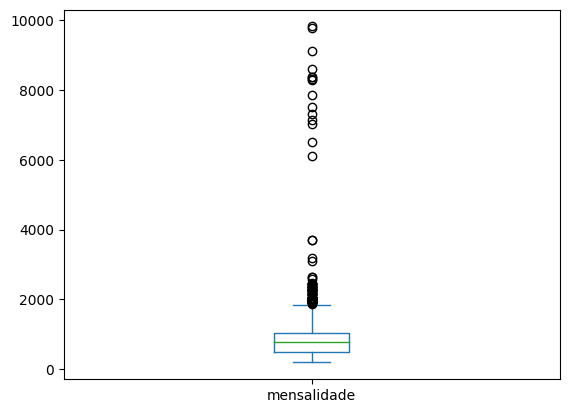

In [0]:
df_spark_prouni.toPandas()['mensalidade'].plot.box()

<Axes: >

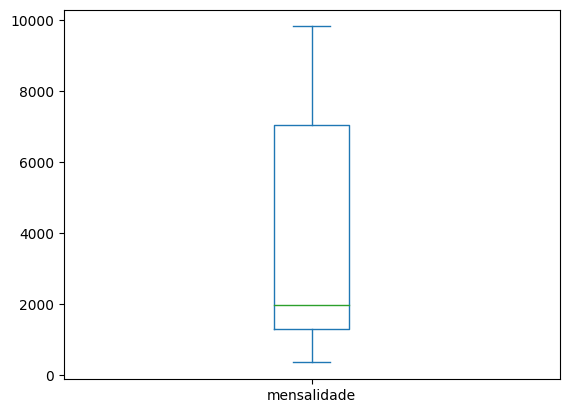

In [0]:
df_spark_prouni.toPandas()[df_spark_prouni.toPandas()['turno'] == 'Integral']['mensalidade'].plot.box()

<Axes: >

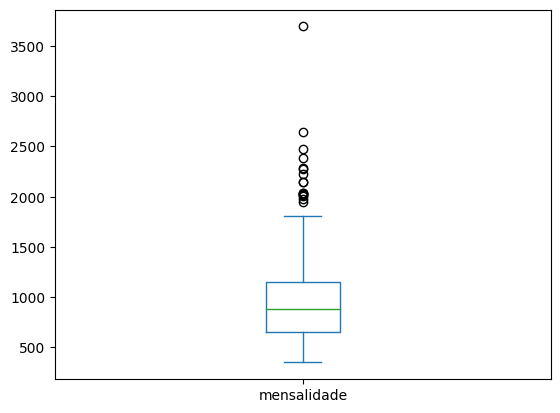

In [0]:
df_spark_prouni.toPandas()[df_spark_prouni.toPandas()['turno'] == 'Matutino']['mensalidade'].plot.box()

<Axes: >

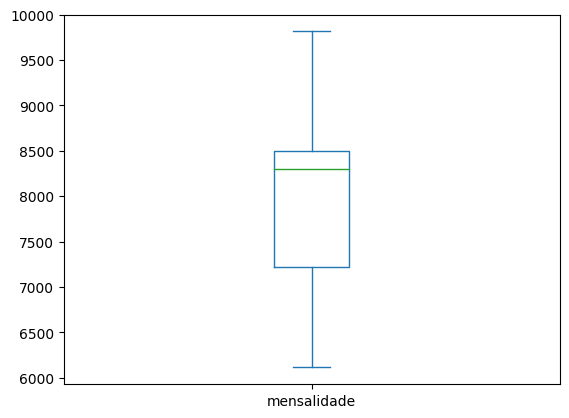

In [0]:
df_spark_prouni.toPandas()[df_spark_prouni.toPandas()['nome_curso'] == 'Medicina']['mensalidade'].plot.box()

<Axes: >

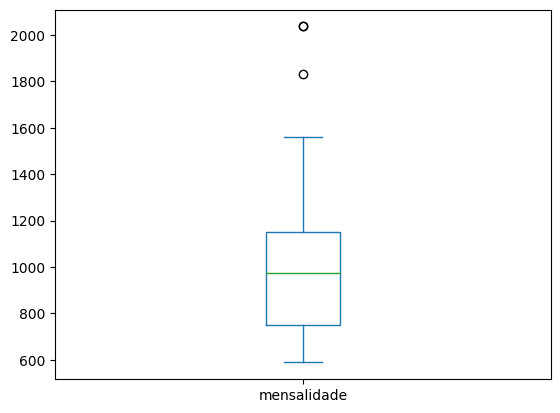

In [0]:
df_spark_prouni.toPandas()[df_spark_prouni.toPandas()['nome_curso'] == 'Enfermagem']['mensalidade'].plot.box()

### Verifying which faculties and universities

In [0]:
selection_spark = df_medicine_spark \
    .filter(col('universidade_nome').contains('Universidade')) \
    .select('universidade_nome')

In [0]:
display(selection_spark)

universidade_nome Universidade de Franca - UNIFRAN Universidade Cidade de São Paulo - UNICID Universidade do Ceuma - Uniceuma - UNICEUMA Universidade do Ceuma - Uniceuma - UNICEUMA

### Separating university acronyms

Beforehand, a small error was found in one of the records, in the record below the university does not have an acronym.

In [0]:
df_medicine_spark.filter(~col('universidade_nome').contains('-')).select('universidade_nome').display()

universidade_nome Centro Universitário Integrado de Campo Mourão

In [0]:
df_medicine_spark = df_medicine_spark \
    .withColumn('universidade_nome', when(~col('universidade_nome').contains('-'), 'Centro Universitário Integrado de Campo Mourão - CUICM').otherwise(col('universidade_nome')))

In [0]:
df_medicine_spark.filter(~col('universidade_nome').contains('-')).select('universidade_nome').display()

universidade_nome

In [0]:
df_medicine_spark.select('universidade_nome').display()

universidade_nome Faculdade das Américas - FAM Universidade de Franca - UNIFRAN Centro Universitário São Lucas - UniSL Faculdade Campo Real - CAMPO REAL Faculdade Redentor - FACREDENTOR Faculdade Brasileira - MULTIVIX VITÓRIA Faculdades Integradas Pitágoras - FIP-MOC Universidade Cidade de São Paulo - UNICID Faculdade Barão do Rio Branco - FAB Faculdade Metropolitana da Amazônia - FAMAZ Universidade do Ceuma - Uniceuma - UNICEUMA Centro Universitário Integrado de Campo Mourão - CUICM Universidade do Ceuma - Uniceuma - UNICEUMA Faculdade de Ciências Médicas da Paraíba - FCM-PB Faculdade da Saúde e Ecologia Humana - FASEH

In [0]:
df_medicine_spark = df_medicine_spark.withColumn('sigla', split(col('universidade_nome'), ' - ')[1])

In [0]:
df_medicine_spark.display()

curso_id grau turno mensalidade bolsa_integral_cotas bolsa_integral_ampla bolsa_parcial_cotas bolsa_parcial_ampla cidade_busca tipo_cidade uf_busca cidade_filtro universidade_nome campus_nome campus_id nome_curso nota_integral_ampla nota_integral_cotas nota_parcial_ampla nota_parcial_cotas sigla 105596711902804 Bacharelado Integral 8300.0 2 3 4 7 Sao Paulo Capital SP MzUxNTA2MTUwMzA4 Faculdade das Américas - FAM RUA AUGUSTA - Consolação 1055967 Medicina 735.84 724.7 738.42 723.28 FAM 65793650009334 Bacharelado Integral 7316.79 2 3 4 8 Franca Município SP MzUwMjAxMjE2MjAw Universidade de Franca - UNIFRAN POLO NA SEDE - Parque Universitário 657936 Medicina 744.88 730.88 741.36 721.08 UNIFRAN 658461856524 Bacharelado Integral 7009.97 4 3 9 5 Porto Velho Município RO MTEwMTAwMTAwMjA1 Centro Universitário São Lucas - UniSL CAMPUS - PORTO VELHO - AREAL - Areal 658461 Medicina 742.72 720.2 729.72 711.68 UniSL 66007913994844 Bacharelado Integral 6498.55 1 1 1 4 Guarapuava Município PR NDEwODAyOTA5NDAx Faculdade Campo Real - CAMPO REAL BLOCO 1 - Santa Cruz 660079 Medicina 781.2 731.04 745.06 741.0 CAMPO REAL 65921511844324 Bacharelado Integral 9123.07 4 4 5 5 Itaperuna Município RJ MzMwMTAwMTAyMjA1 Faculdade Redentor - FACREDENTOR CAMPUS - ITAPERUNA - PRESIDENTE COSTA E SILVA - Presidente Costa e Silva 659215 Medicina 741.06 729.02 730.98 722.82 FACREDENTOR 658345863564 Bacharelado Integral 6113.0 3 3 1 1 Vitoria Município ES MzIwMzAwOTA1MzA5 Faculdade Brasileira - MULTIVIX VITÓRIA CAMPUS GOIABEIRAS - Goiabeiras 658345 Medicina 762.74 749.0 776.36 768.34 MULTIVIX VITÓRIA 7052291076664 Bacharelado Integral 7130.0 1 1 1 1 Montes Claros Município MG MzEwMjAwNzQzMzAy Faculdades Integradas Pitágoras - FIP-MOC UNIDADE SEDE - Ibituruna 705229 Medicina 765.76 741.1 774.96 750.64 FIP-MOC 1002328574024 Bacharelado Integral 9815.61 2 5 6 10 Sao Paulo Capital SP MzUxNTA2MTUwMzA4 Universidade Cidade de São Paulo - UNICID UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SEDE - Tatuapé 1002328 Medicina 739.62 738.08 738.96 718.64 UNICID 65899611932754 Bacharelado Integral 9774.34 4 1 5 2 Rio Branco Município AC MTIwMjAwNDAwNDAx Faculdade Barão do Rio Branco - FAB CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jardim Europa II 658996 Medicina 758.32 723.94 734.92 711.26 FAB 104123711716094 Bacharelado Integral 8608.54 2 1 7 2 Belem Capital PA MTUwMzAwNzAxNDAy Faculdade Metropolitana da Amazônia - FAMAZ FACULDADE METROPOLITANA DA AMAZÔNIA - FAMAZ - Reduto 1041237 Medicina 741.36 739.9 760.8 715.1 FAMAZ 658119591744 Bacharelado Integral 8381.37 4 1 8 2 Sao Luis Capital MA MjEwMTAwMjExMzAw Universidade do Ceuma - Uniceuma - UNICEUMA UNICEUMA - CAMPUS RENASCENÇA - Renascença II 658119 Medicina 757.84 738.9 735.76 718.48 Uniceuma 70703413994804 Bacharelado Integral 7850.0 1 1 1 3 Campo Mourao Município PR NDEwMjAwNTA0MzAz Centro Universitário Integrado de Campo Mourão - CUICM UNIDADE CAMPUS - Jardim Batel 707034 Medicina 745.46 746.1 743.14 690.18 CUICM 105887911921884 Bacharelado Integral 8381.38 3 1 6 2 Imperatriz Município MA MjEwMjAwOTA1MzAy Universidade do Ceuma - Uniceuma - UNICEUMA UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPERATRIZ - Maranhão Novo 1058879 Medicina 756.46 737.88 747.14 717.6 Uniceuma 1079920726674 Bacharelado Integral 7512.7 8 5 5 3 Joao Pessoa Capital PB MjUwNDAyMjA3NTA3 Faculdade de Ciências Médicas da Paraíba - FCM-PB LADEIRA DE S FRANCISCO - Centro 1079920 Medicina 754.98 733.6 748.78 727.58 FCM-PB 137380663614 Bacharelado Integral 8295.0 1 1 4 3 Vespasiano Município MG MzEwNzAzMDcxMjA0 Faculdade da Saúde e Ecologia Humana - FASEH UNIDADE SEDE - Jardim Alterosa 137380 Medicina 770.5 792.24 750.44 732.46 FASEH

In [0]:
df_medicine_spark = df_medicine_spark\
    .select(
        'curso_id',
        'grau',
        'turno',
        'mensalidade',
        'bolsa_integral_cotas',
        'bolsa_integral_ampla',
        'bolsa_parcial_cotas',
        'bolsa_parcial_ampla',
        'cidade_busca',
        'tipo_cidade',
        'uf_busca',
        'cidade_filtro',
        'universidade_nome',
        'sigla',
        'campus_nome',
        'campus_id',
        'nome_curso',
        'nota_integral_ampla',
        'nota_integral_cotas',
        'nota_parcial_ampla',
        'nota_parcial_cotas'
    )

In [0]:
ordered_notes_spark = df_medicine_spark \
    .groupBy('sigla') \
    .agg(round(mean('nota_integral_ampla'), 2).alias('nota_media')) \
    .orderBy(col('nota_media').desc())

In [0]:
ordered_notes_spark.display()

sigla nota_media CAMPO REAL 781.2 FASEH 770.5 FIP-MOC 765.76 MULTIVIX VITÓRIA 762.74 FAB 758.32 Uniceuma 757.15 FCM-PB 754.98 CUICM 745.46 UNIFRAN 744.88 UniSL 742.72 FAMAZ 741.36 FACREDENTOR 741.06 UNICID 739.62 FAM 735.84

Databricks visualization. Run in Databricks to view.

### Extracting data from an HTML page

#### Obs: 

!pip install lxml

use this command to install the resource: lxml so you can extract the texts from the url.

In [0]:
url = 'https://pt.wikipedia.org/wiki/Ensino_superior_no_Brasil'

In [0]:
list_spark = ps.read_html(url)
type(list_spark)

list

In [0]:
df_spark_publics = list_spark[0].to_spark()

In [0]:
df_spark_publics.display()

Classificação Nacional Classificação Mundial Universidade Logo sigla tipo web Localização 1 72 Universidade de São Paulo null USP Pública Estadual www5.usp.br/ São Paulo 2 236 Universidade Estadual de Campinas null UNICAMP Pública Estadual www.unicamp.br/ São Paulo 3 278 Universidade Federal do Rio de Janeiro null UFRJ Pública federal ufrj.br/ Rio de Janeiro 4 298 Universidade Federal de Minas Gerais null UFMG Pública federal ucb.edu.bo Minas Gerais 5 345 Universidade Estadual Paulista null UNESP Pública Estadual www.unesp.br São Paulo 6 427 Universidade Federal de Santa Catarina null UFSC Pública federal ufsc.br/ Santa Catarina 7 592 Universidade de Brasília null UNB Pública Estadual www.unb.br/ Distrito Federal 8 593 Universidade Federal do Paraná null UFPR Pública federal www.ufpr.br/ Paraná 9 596 Universidade Federal Fluminense null UFF Pública federal www.uff.br/ Rio de Janeiro 10 667 Universidade Federal de São Carlos null UFSCAR Pública federal www.ufscar.br/ São Paulo

In [0]:
df_spark_publics.display()

Classificação Nacional Classificação Mundial Universidade Logo sigla tipo web Localização 1 72 Universidade de São Paulo null USP Pública Estadual www5.usp.br/ São Paulo 2 236 Universidade Estadual de Campinas null UNICAMP Pública Estadual www.unicamp.br/ São Paulo 3 278 Universidade Federal do Rio de Janeiro null UFRJ Pública federal ufrj.br/ Rio de Janeiro 4 298 Universidade Federal de Minas Gerais null UFMG Pública federal ucb.edu.bo Minas Gerais 5 345 Universidade Estadual Paulista null UNESP Pública Estadual www.unesp.br São Paulo 6 427 Universidade Federal de Santa Catarina null UFSC Pública federal ufsc.br/ Santa Catarina 7 592 Universidade de Brasília null UNB Pública Estadual www.unb.br/ Distrito Federal 8 593 Universidade Federal do Paraná null UFPR Pública federal www.ufpr.br/ Paraná 9 596 Universidade Federal Fluminense null UFF Pública federal www.uff.br/ Rio de Janeiro 10 667 Universidade Federal de São Carlos null UFSCAR Pública federal www.ufscar.br/ São Paulo

Databricks visualization. Run in Databricks to view.

In [0]:
df_spark_publics.display()

Classificação Nacional Classificação Mundial Universidade Logo sigla tipo web Localização 1 72 Universidade de São Paulo null USP Pública Estadual www5.usp.br/ São Paulo 2 236 Universidade Estadual de Campinas null UNICAMP Pública Estadual www.unicamp.br/ São Paulo 3 278 Universidade Federal do Rio de Janeiro null UFRJ Pública federal ufrj.br/ Rio de Janeiro 4 298 Universidade Federal de Minas Gerais null UFMG Pública federal ucb.edu.bo Minas Gerais 5 345 Universidade Estadual Paulista null UNESP Pública Estadual www.unesp.br São Paulo 6 427 Universidade Federal de Santa Catarina null UFSC Pública federal ufsc.br/ Santa Catarina 7 592 Universidade de Brasília null UNB Pública Estadual www.unb.br/ Distrito Federal 8 593 Universidade Federal do Paraná null UFPR Pública federal www.ufpr.br/ Paraná 9 596 Universidade Federal Fluminense null UFF Pública federal www.uff.br/ Rio de Janeiro 10 667 Universidade Federal de São Carlos null UFSCAR Pública federal www.ufscar.br/ São Paulo

Databricks visualization. Run in Databricks to view.